# MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES

**Descripción de la tarea:**

El fichero 20230119_DatosBoston incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos

1. **Visualización y familiarización del dataset (2p)**: Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.
2. **Análisis de correlación y de componentes principales (3p)**: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
3. **Análisis de ANOVA (2p)**: Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos
4. **Desarrollo y justificación de las variables (1p)**: En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?
5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?  


## <font color='#3d59c6'>  CARGA DE PACKAGES </font>


In [14]:
 #install.packages("olsrr") #5 min

In [15]:
 # install.packages("caret") #6 min

In [16]:
# install.packages('gridExtra')
# install.packages ('GGally')
# install.packages('nortest')
# install.packages("corrplot")
# install.packages("lmtest")

In [17]:
library(dplyr)
library(MASS)
library(class)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(GGally)
library(nortest)
library(caret)
library(MASS)
library(lmtest)
library(olsrr)

## <font color='#3d59c6'>  CARGA DE DATOS </font>





    


In [18]:
#subimos el fichero 20230119_SerieMacroeconomica.csv a nuestro entorno jupyter
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_ab y checkeamos los datos cargados

data_boston = read.csv(file='/content/20230119_DatosBoston.csv', header=TRUE, sep=';', dec='.')
head(data_boston)#de forma predefinida retorna las primeras 6 observations
tail(data_boston)#de forma predefinida retorna las últimas 6 observations

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,24.982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,24.786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,22.875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,21.675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,23.889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.505,1,273,21.0,396.90,7.88,11.9


## <font color='#3d59c6'>  **Visualización y familiarización del dataset ** </font>

### <font color='#3d59c6'>  VARIABLE OBJETIVO </font>

- Variable dependiente (target) **median_value**: Valor medio de precio de la vivienda (En 10000USD)


### <font color='#3d59c6'>  VARIABLES EXPLICATIVAS </font>

- Variables explicativas o predictoras:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”

In [19]:
str(data_boston)

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [20]:
sum(is.na(data_boston))# Núm de NA #comprobar si existen valores nulls

[1] 0

In [21]:
summary(data_boston)

  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12

Llama la atención la variable crime_index, donde la media y la mediana difieren bastante. Algo similar al caso de Urban_ratio.

Se confirma que c_river_variable es de tipo boleana



####Visualización de la variable objetivo

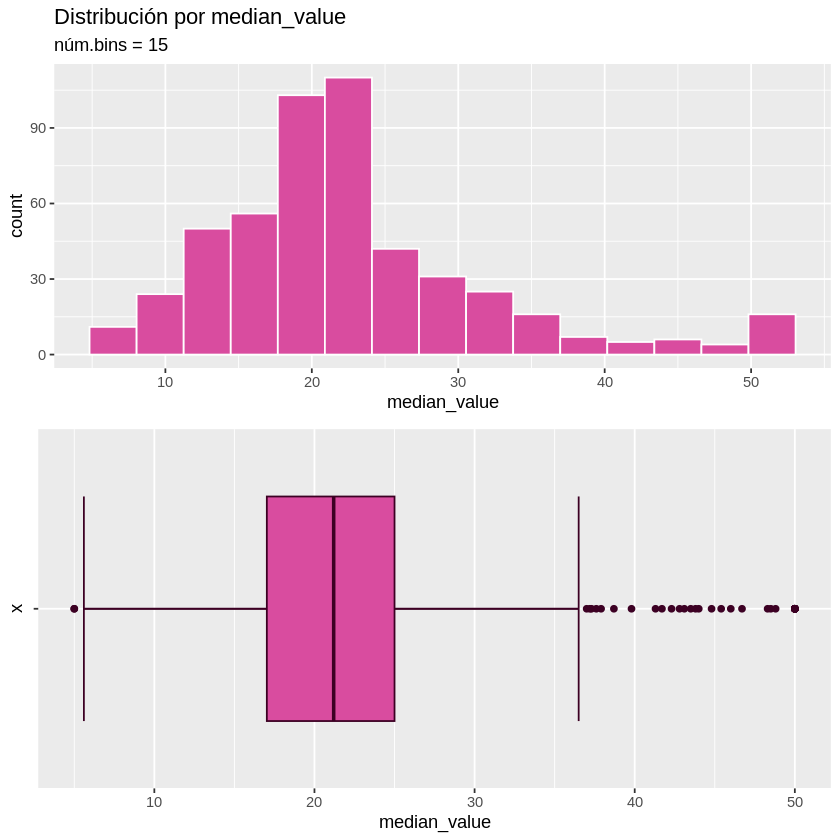

In [22]:
# Histograma y Boxplot de la variable objetivo
a <- ggplot(data_boston, aes(x = median_value)) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por median_value", subtitle = "núm.bins = 15", x = "median_value")

b <- ggplot(data_boston, aes(x = "", y = median_value)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)


Se observa un comportamiento gausiano de los datos, con demasiados outliers

####Visualización de la variables explicativas

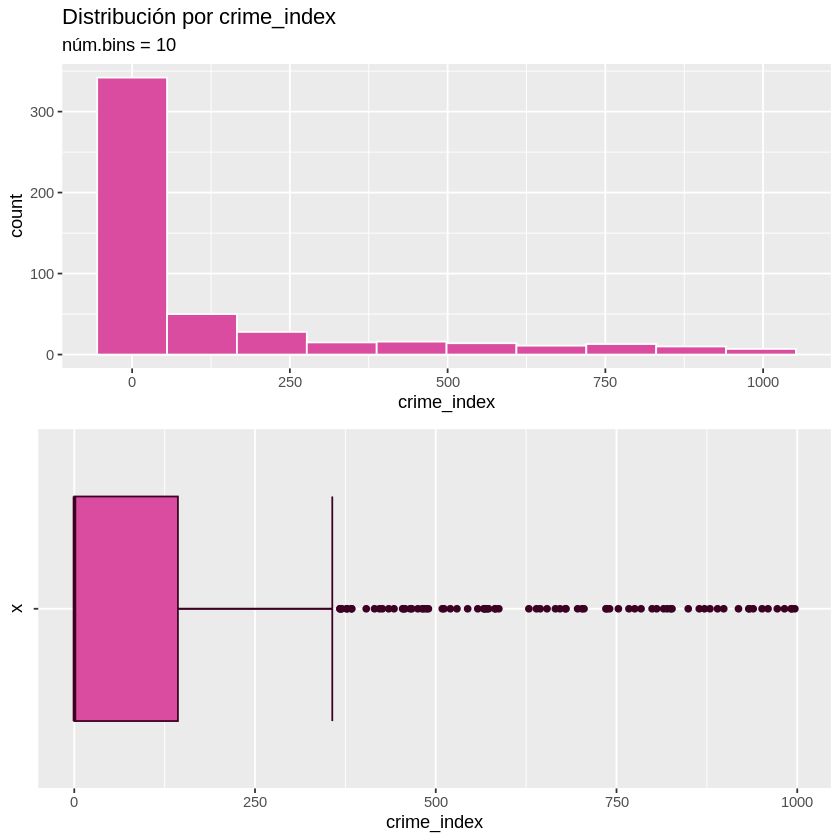

In [23]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = crime_index)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por crime_index", subtitle = "núm.bins = 10", x = "crime_index")

b <- ggplot(data_boston, aes(x = "", y = crime_index)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

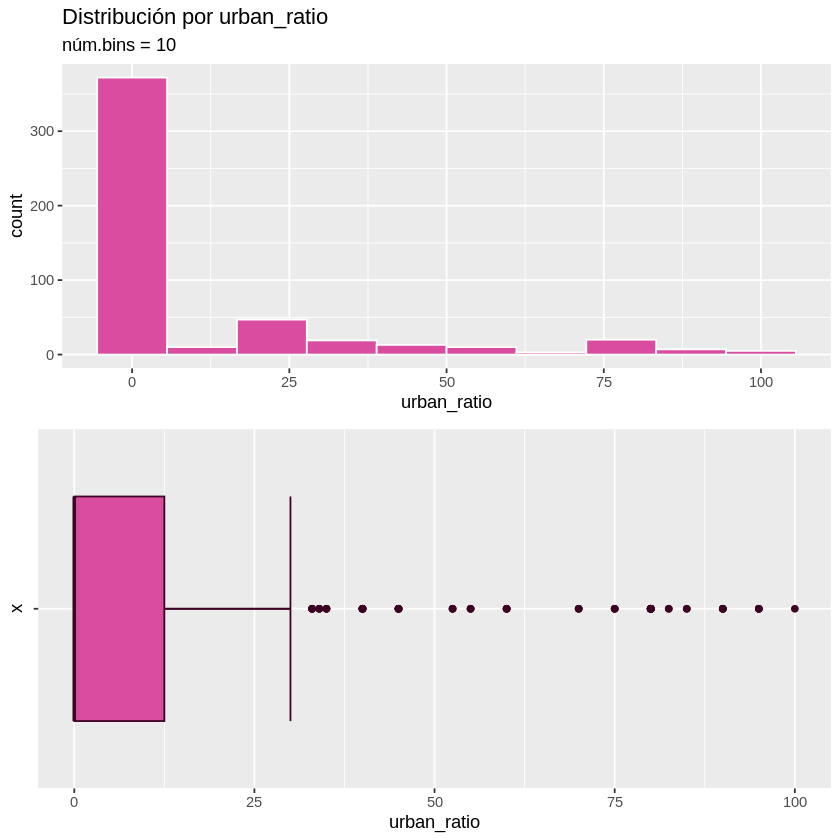

In [24]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = urban_ratio)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por urban_ratio", subtitle = "núm.bins = 10", x = "urban_ratio")

b <- ggplot(data_boston, aes(x = "", y = urban_ratio)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

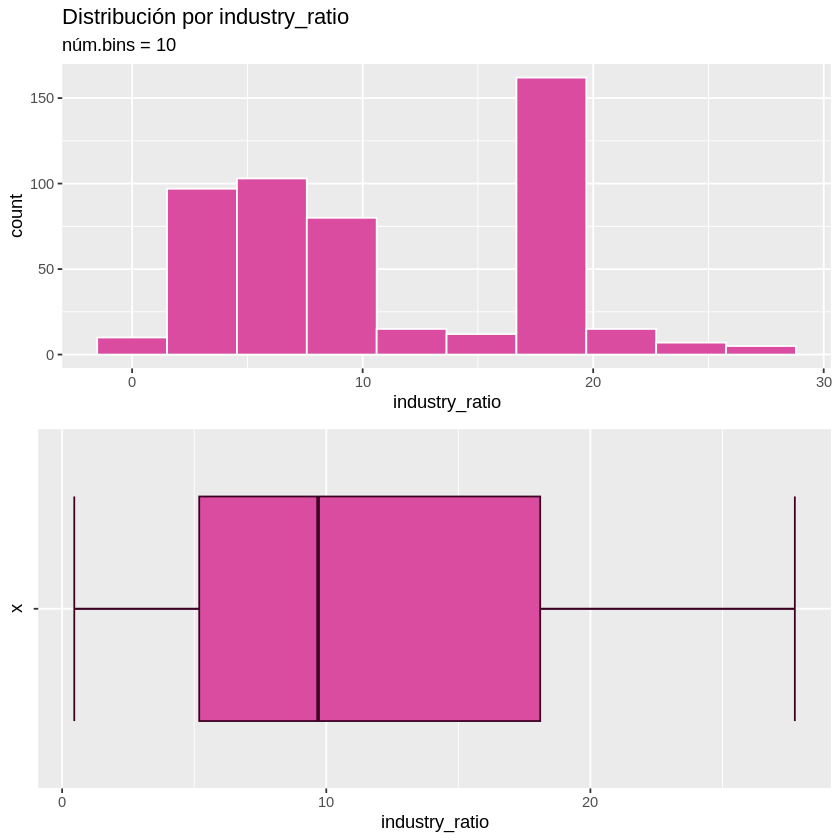

In [25]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = industry_ratio)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por industry_ratio", subtitle = "núm.bins = 10", x = "industry_ratio")

b <- ggplot(data_boston, aes(x = "", y = industry_ratio)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

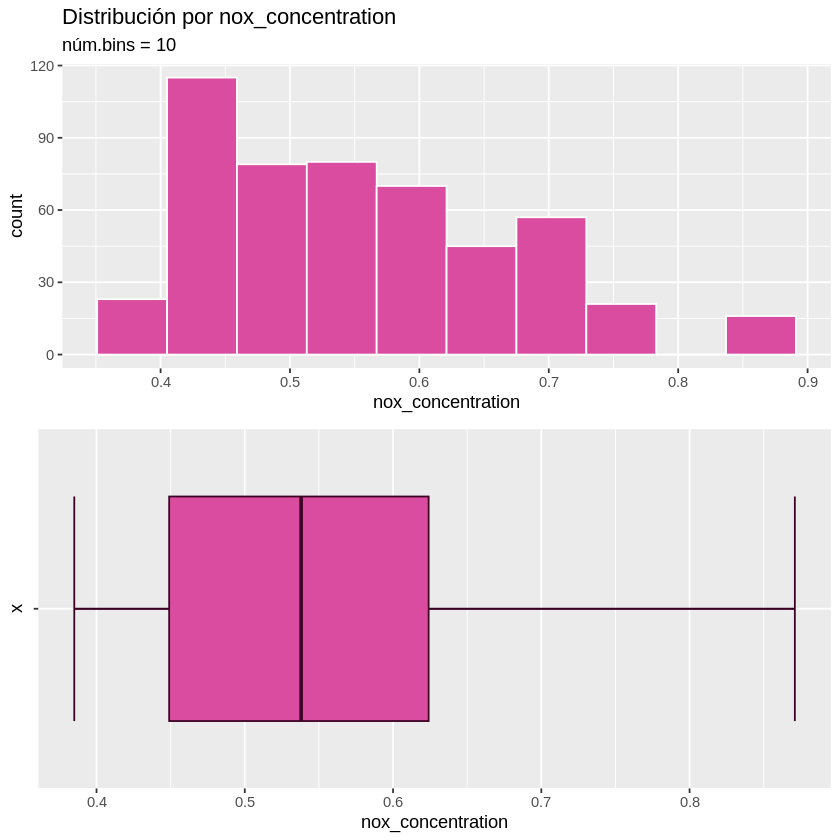

In [26]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = nox_concentration)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por nox_concentration", subtitle = "núm.bins = 10", x = "nox_concentration")

b <- ggplot(data_boston, aes(x = "", y = nox_concentration)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

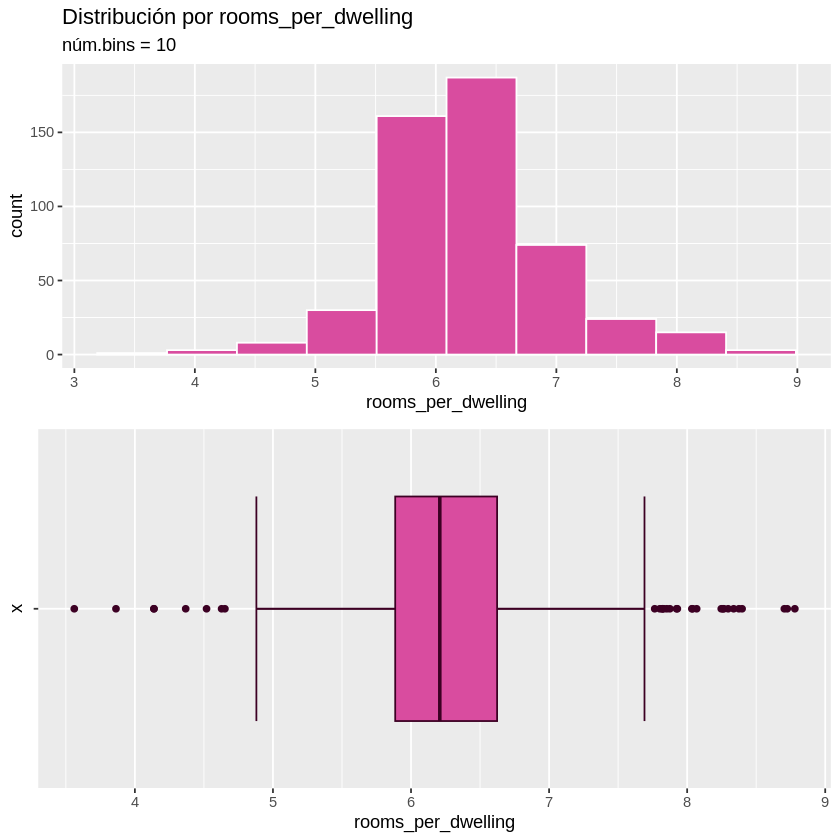

In [27]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = rooms_per_dwelling)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por rooms_per_dwelling", subtitle = "núm.bins = 10", x = "rooms_per_dwelling")

b <- ggplot(data_boston, aes(x = "", y = rooms_per_dwelling)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

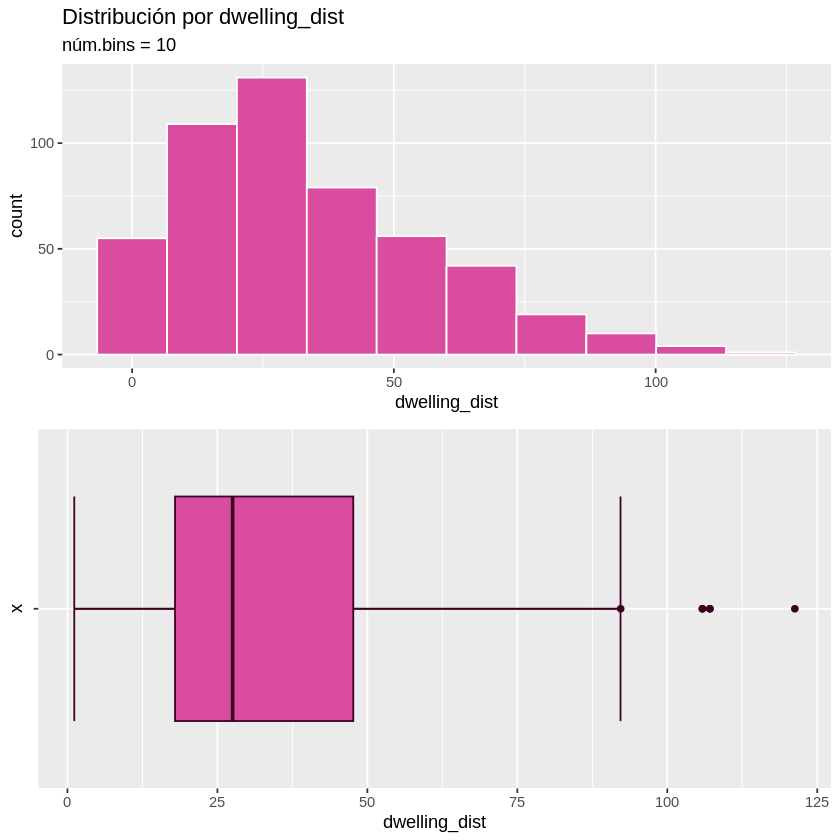

In [28]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = dwelling_dist)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por dwelling_dist", subtitle = "núm.bins = 10", x = "dwelling_dist")

b <- ggplot(data_boston, aes(x = "", y = dwelling_dist)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

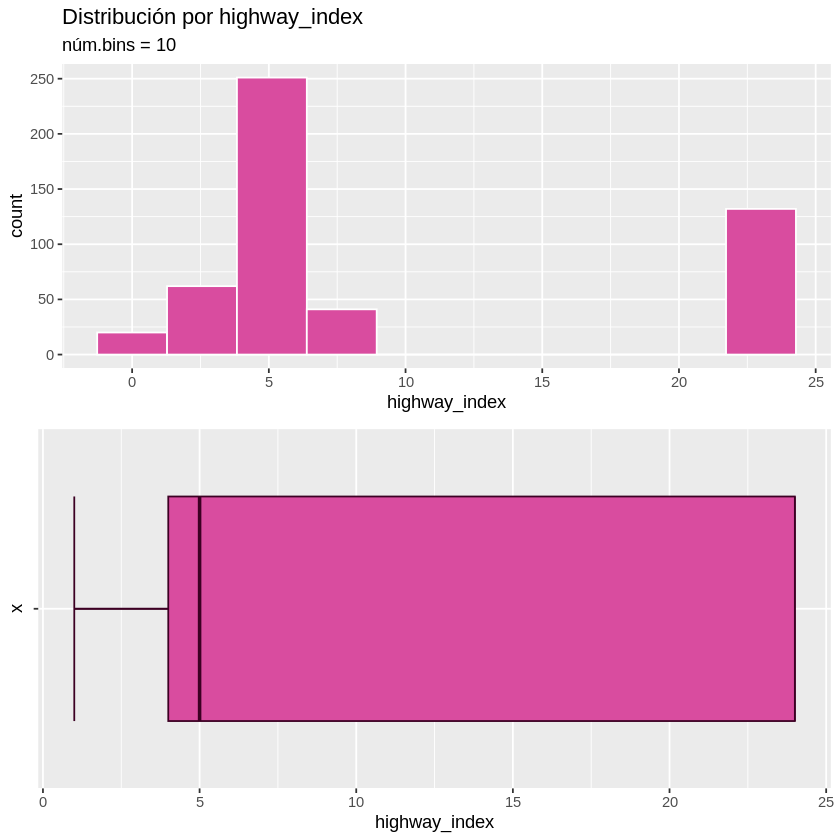

In [29]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = highway_index)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por highway_index", subtitle = "núm.bins = 10", x = "highway_index")

b <- ggplot(data_boston, aes(x = "", y = highway_index)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

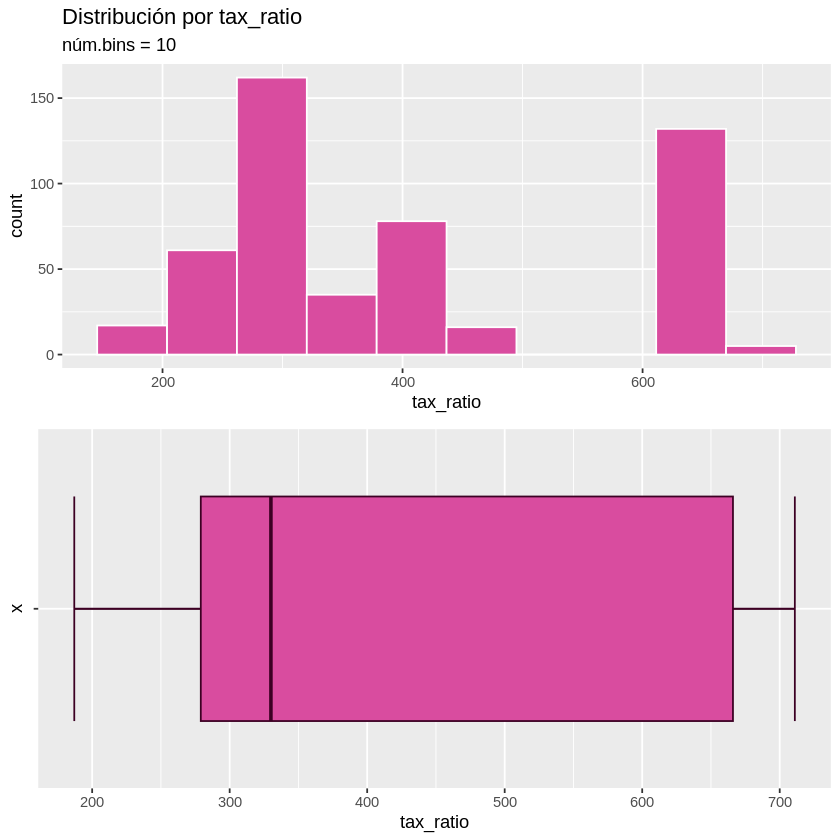

In [30]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = tax_ratio)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por tax_ratio", subtitle = "núm.bins = 10", x = "tax_ratio")

b <- ggplot(data_boston, aes(x = "", y = tax_ratio)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

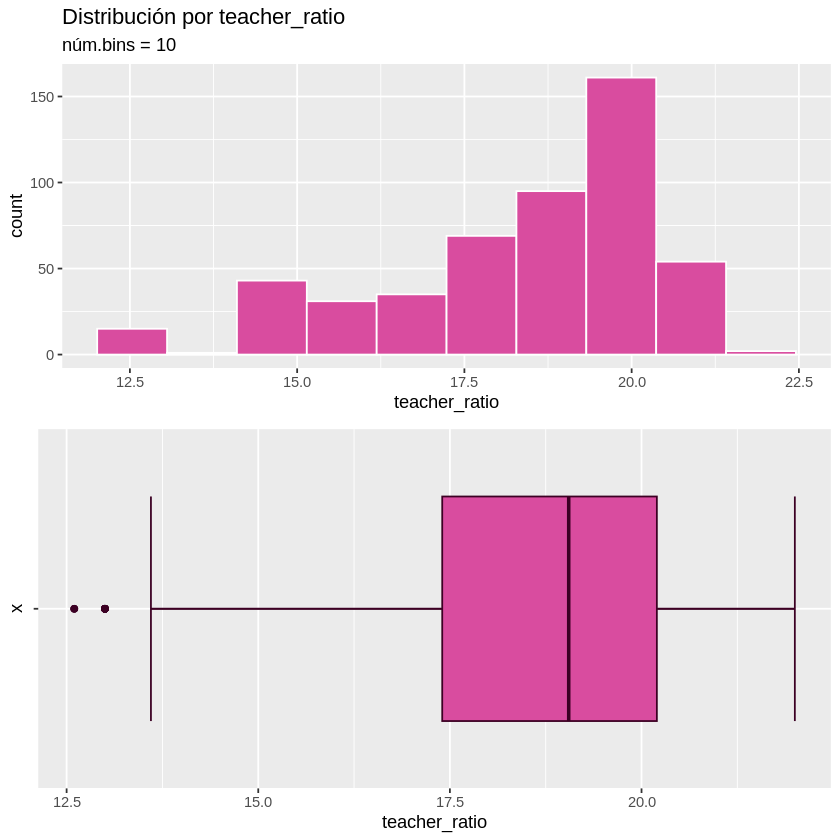

In [31]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = teacher_ratio)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por teacher_ratio", subtitle = "núm.bins = 10", x = "teacher_ratio")

b <- ggplot(data_boston, aes(x = "", y = teacher_ratio)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

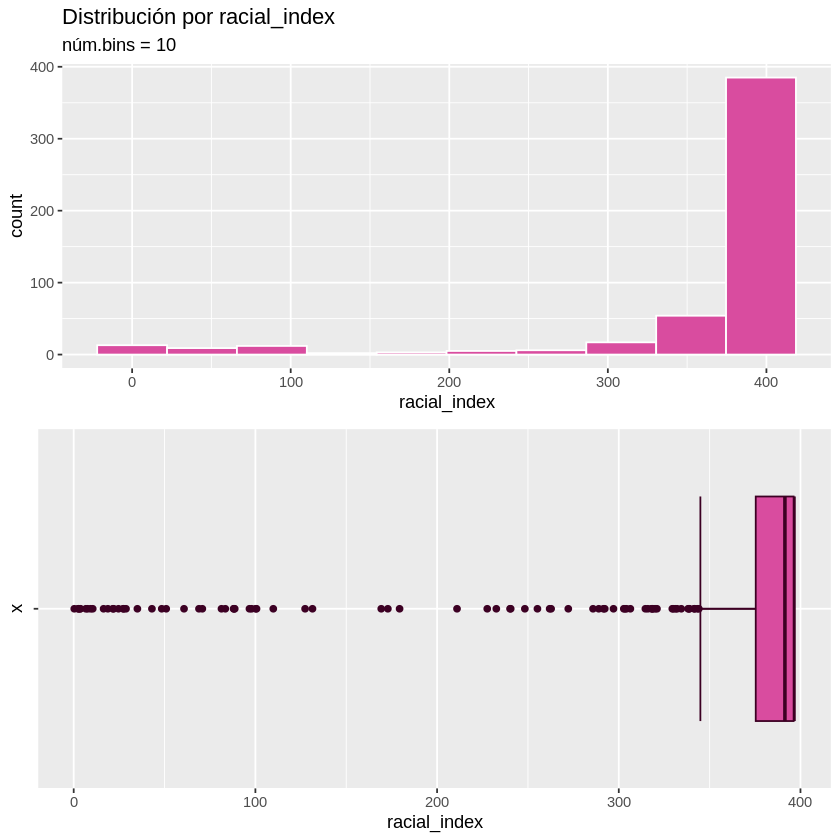

In [32]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = racial_index)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por racial_index", subtitle = "núm.bins = 10", x = "racial_index")

b <- ggplot(data_boston, aes(x = "", y = racial_index)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

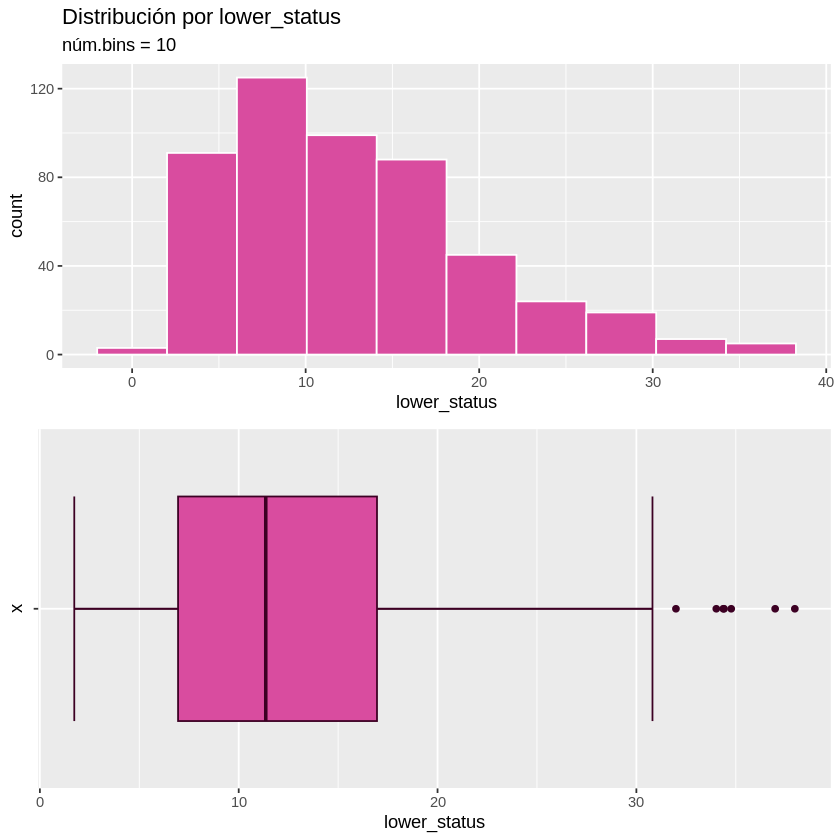

In [33]:
# Histograma y Boxplot de las variables dependientes
a <- ggplot(data_boston, aes(x = lower_status)) +
  geom_histogram(bins = 10, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por lower_status", subtitle = "núm.bins = 10", x = "lower_status")

b <- ggplot(data_boston, aes(x = "", y = lower_status)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip()

grid.arrange(a, b)

Las variables crime_index, urban_ratio, rooms per dweling, racial_index presentan demasiados outliers.

Las variables Highway_index y tax ratio, parece tener una concentración de datos cercana a la media y al ultimo quartíl.

## <font color='#3d59c6'>  ESTUDIO DE CORRELACIÓN Y PCA </font>



### <font color='#3d59c6'>  ANÁLISIS CORRELACIÓN </font>

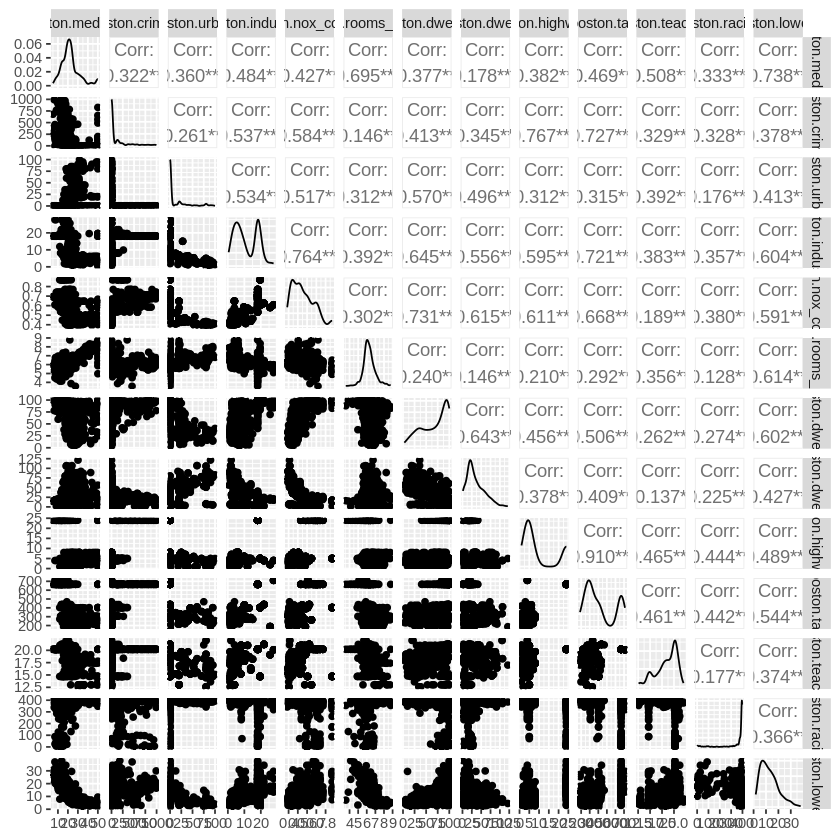

In [34]:

data_boston_key <- data.frame(
  data_boston$median_value,
  data_boston$crime_index,
  data_boston$urban_ratio,
  data_boston$industry_ratio,
  data_boston$nox_concentration,
  data_boston$rooms_per_dwelling,
  data_boston$dwelling_age,
  data_boston$dwelling_dist,
  data_boston$highway_index,
  data_boston$tax_ratio,
  data_boston$teacher_ratio,
  data_boston$racial_index,
  data_boston$lower_status
)
ggpairs(data_boston_key)

In [35]:
cor(data_boston_key)

,data_boston.median_value,data_boston.crime_index,data_boston.urban_ratio,data_boston.industry_ratio,data_boston.nox_concentration,data_boston.rooms_per_dwelling,data_boston.dwelling_age,data_boston.dwelling_dist,data_boston.highway_index,data_boston.tax_ratio,data_boston.teacher_ratio,data_boston.racial_index,data_boston.lower_status
data_boston.median_value,1.0000000,-0.3223877,0.3604453,-0.4837252,-0.4273208,0.6953599,-0.3769546,0.1780964,-0.3816262,-0.4685359,-0.5077867,0.3334608,-0.7376627
data_boston.crime_index,-0.3223877,1.0000000,-0.2607784,0.5374257,0.5836078,-0.1461261,0.4132972,-0.3454091,0.7673517,0.7271603,0.3293693,-0.3283539,0.3778286
data_boston.urban_ratio,0.3604453,-0.2607784,1.0000000,-0.5338282,-0.5166037,0.3119906,-0.5695373,0.4960046,-0.3119478,-0.3145633,-0.3916785,0.1755203,-0.4129946
data_boston.industry_ratio,-0.4837252,0.5374257,-0.5338282,1.0000000,0.7636514,-0.3916759,0.6447785,-0.5560553,0.5951293,0.7207602,0.3832476,-0.3569765,0.6037997
data_boston.nox_concentration,-0.4273208,0.5836078,-0.5166037,0.7636514,1.0000000,-0.3021882,0.7314701,-0.6152234,0.6114406,0.6680232,0.1889327,-0.3800506,0.5908789
data_boston.rooms_per_dwelling,0.6953599,-0.1461261,0.3119906,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.1459429,-0.2098467,-0.2920478,-0.3555015,0.1280686,-0.6138083
data_boston.dwelling_age,-0.3769546,0.4132972,-0.5695373,0.6447785,0.7314701,-0.2402649,1.0000000,-0.6428017,0.4560225,0.5064556,0.2615150,-0.2735340,0.6023385
data_boston.dwelling_dist,0.1780964,-0.3454091,0.4960046,-0.5560553,-0.6152234,0.1459429,-0.6428017,1.0000000,-0.3777592,-0.4089086,-0.1373670,0.2247804,-0.4267859
data_boston.highway_index,-0.3816262,0.7673517,-0.3119478,0.5951293,0.6114406,-0.2098467,0.4560225,-0.3777592,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763
data_boston.tax_ratio,-0.4685359,0.7271603,-0.3145633,0.7207602,0.6680232,-0.2920478,0.5064556,-0.4089086,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934


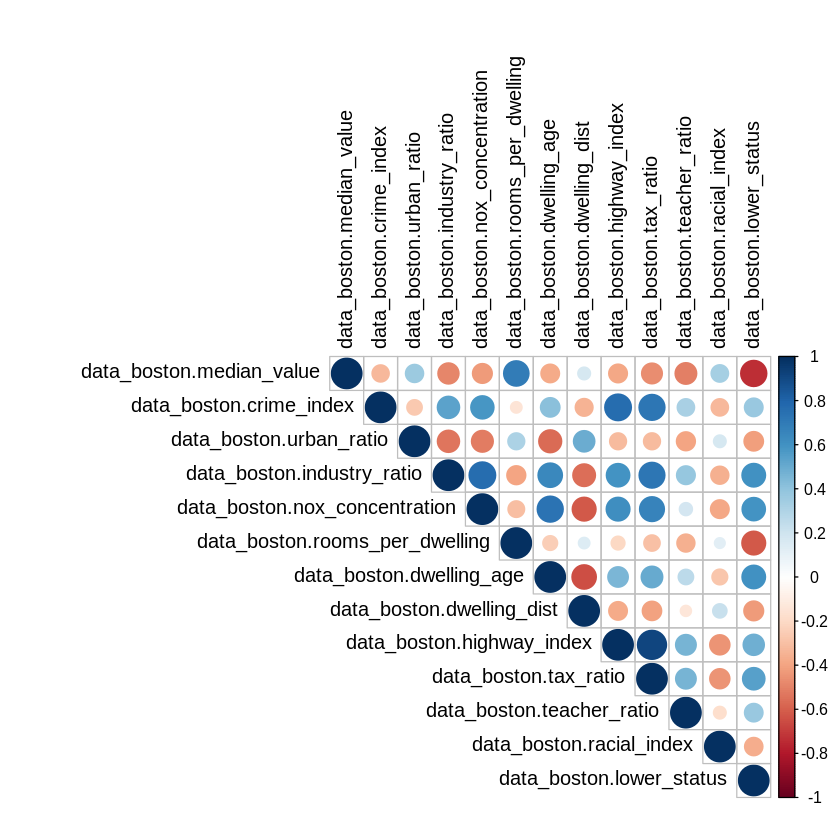

In [36]:
### Análisis de correlación
corrplot::corrplot(cor(data_boston_key)
                   , type = "upper" #para que solo muestre de la diagonal hacia arriba (la otra mitad es igual)
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

Las variables que mas se mas se correlacionan con la variable objetivo median_value son:

*   lower_status   
*   rooms_per_dwelling
*   teacher_ratio
*   industry_ratio

Se ha sacado del analisis de correlación la variable boleana "c_river_variable" para tener solo variables continuas. Esta variable será analizada más adelande, utilizando ANOVA

####Visualizando relación entre variable objetivo y explicativas

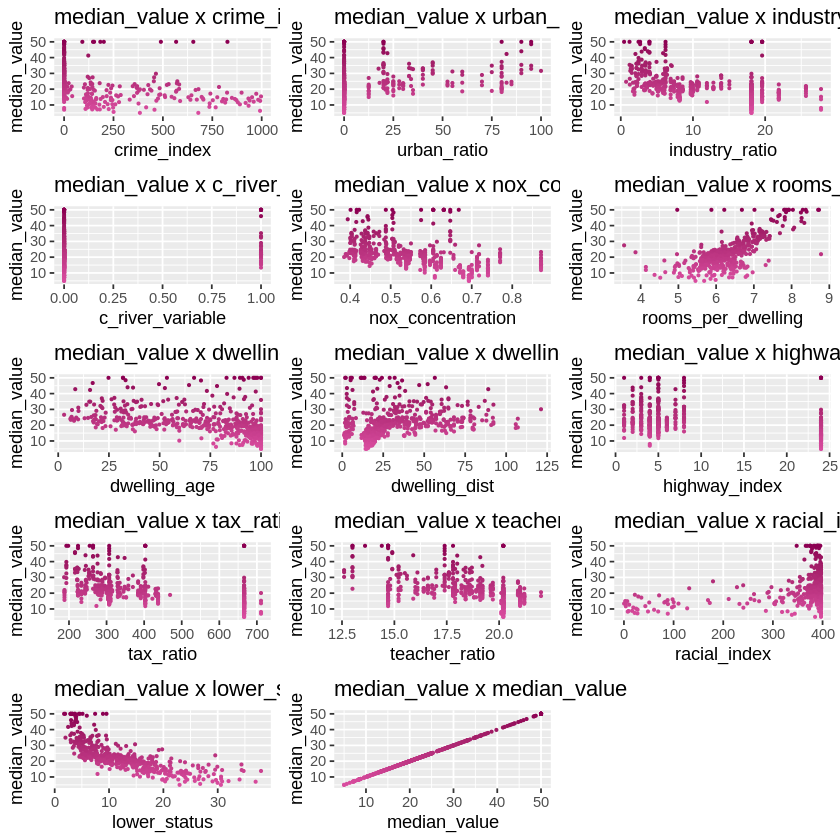

In [37]:


# Variables de explicativas
variables_of_interest <- c(
  "crime_index",
  "urban_ratio",
  "industry_ratio",
  "c_river_variable",
  "nox_concentration",
  "rooms_per_dwelling",
  "dwelling_age",
  "dwelling_dist",
  "highway_index",
  "tax_ratio",
  "teacher_ratio",
  "racial_index",
  "lower_status",
  "median_value"
)

# Crear una lista para almacenar los gráficos
plots_list <- list()

# Iterar sobre las variables y crear los gráficos
for (variable in variables_of_interest) {
  plot <- ggplot(data_boston, aes(x = !!rlang::sym(variable), y = median_value, color = median_value)) +
    geom_point(size = 0.5, show.legend = FALSE) +
    scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
    labs(title = paste("median_value x", variable))

  plots_list[[variable]] <- plot
}

# Mostrar los gráficos en una cuadrícula
grid.arrange(grobs = plots_list, ncol = 3)


Podemos confirmar visualmente la correlación de las variables lower_status y rooms_per_dwelling con la variable objetivo. En las variables teacher_ratio y industry_ratio la correlación no es tan visual.




### <font color='#3d59c6'> **2. Principal Component Analysis (PCA):** </font>


In [38]:
data_boston_cor = data.frame(data_boston$crime_index
                            ,data_boston$urban_ratio
                            ,data_boston$industry_ratio
                            ,data_boston$nox_concentration
                            ,data_boston$rooms_per_dwelling
                            ,data_boston$highway_index
                            ,data_boston$tax_ratio
                            ,data_boston$teacher_ratio
                            ,data_boston$racial_index
                            ,data_boston$lower_status
                            )

round(cor(data_boston_cor),2)
acp = princomp(data_boston_cor,cor=TRUE) #función que llama al pca
summary(acp)
print('desviación estandard componente1:')
sd(predict(acp)[,1:1])
print('varianza componente1:')
var(predict(acp)[,1:1])

,data_boston.crime_index,data_boston.urban_ratio,data_boston.industry_ratio,data_boston.nox_concentration,data_boston.rooms_per_dwelling,data_boston.highway_index,data_boston.tax_ratio,data_boston.teacher_ratio,data_boston.racial_index,data_boston.lower_status
data_boston.crime_index,1.00,-0.26,0.54,0.58,-0.15,0.77,0.73,0.33,-0.33,0.38
data_boston.urban_ratio,-0.26,1.00,-0.53,-0.52,0.31,-0.31,-0.31,-0.39,0.18,-0.41
data_boston.industry_ratio,0.54,-0.53,1.00,0.76,-0.39,0.60,0.72,0.38,-0.36,0.60
data_boston.nox_concentration,0.58,-0.52,0.76,1.00,-0.30,0.61,0.67,0.19,-0.38,0.59
data_boston.rooms_per_dwelling,-0.15,0.31,-0.39,-0.30,1.00,-0.21,-0.29,-0.36,0.13,-0.61
data_boston.highway_index,0.77,-0.31,0.60,0.61,-0.21,1.00,0.91,0.46,-0.44,0.49
data_boston.tax_ratio,0.73,-0.31,0.72,0.67,-0.29,0.91,1.00,0.46,-0.44,0.54
data_boston.teacher_ratio,0.33,-0.39,0.38,0.19,-0.36,0.46,0.46,1.00,-0.18,0.37
data_boston.racial_index,-0.33,0.18,-0.36,-0.38,0.13,-0.44,-0.44,-0.18,1.00,-0.37
data_boston.lower_status,0.38,-0.41,0.60,0.59,-0.61,0.49,0.54,0.37,-0.37,1.00


Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.2690515 1.1413730 0.94067414 0.90188128 0.83252211
Proportion of Variance 0.5148595 0.1302732 0.08848678 0.08133899 0.06930931
Cumulative Proportion  0.5148595 0.6451327 0.73361950 0.81495848 0.88426779
                           Comp.6     Comp.7    Comp.8     Comp.9     Comp.10
Standard deviation     0.59460219 0.54930358 0.5004019 0.43318498 0.252951933
Proportion of Variance 0.03535518 0.03017344 0.0250402 0.01876492 0.006398468
Cumulative Proportion  0.91962297 0.94979641 0.9748366 0.99360153 1.000000000

[1] "desviación estandard componente1:"


[1] 2.271297

[1] "varianza componente1:"


[1] 5.15879

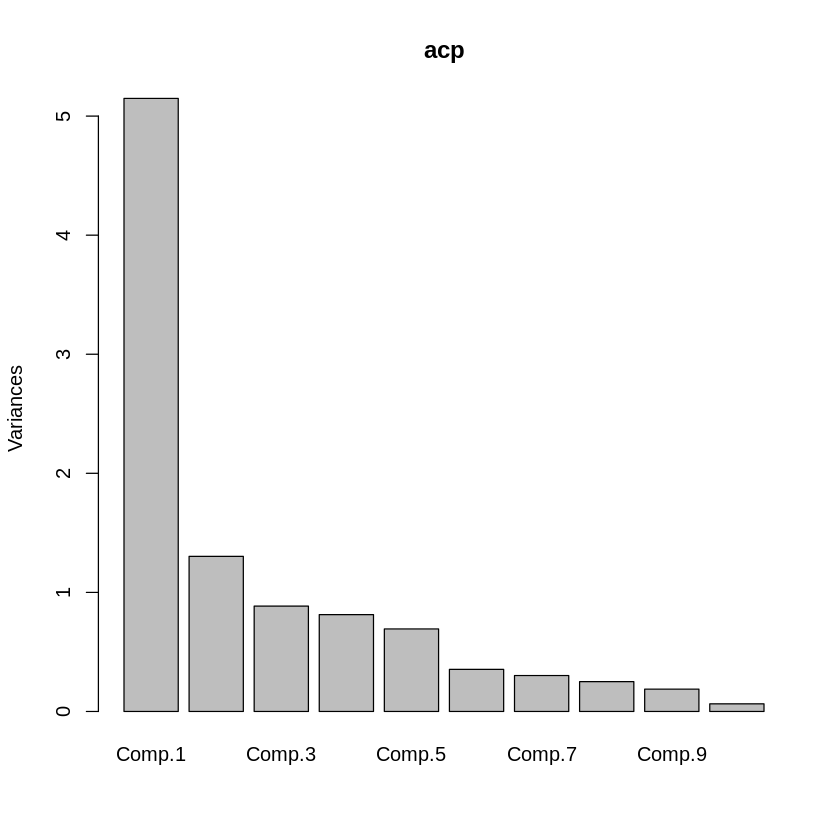

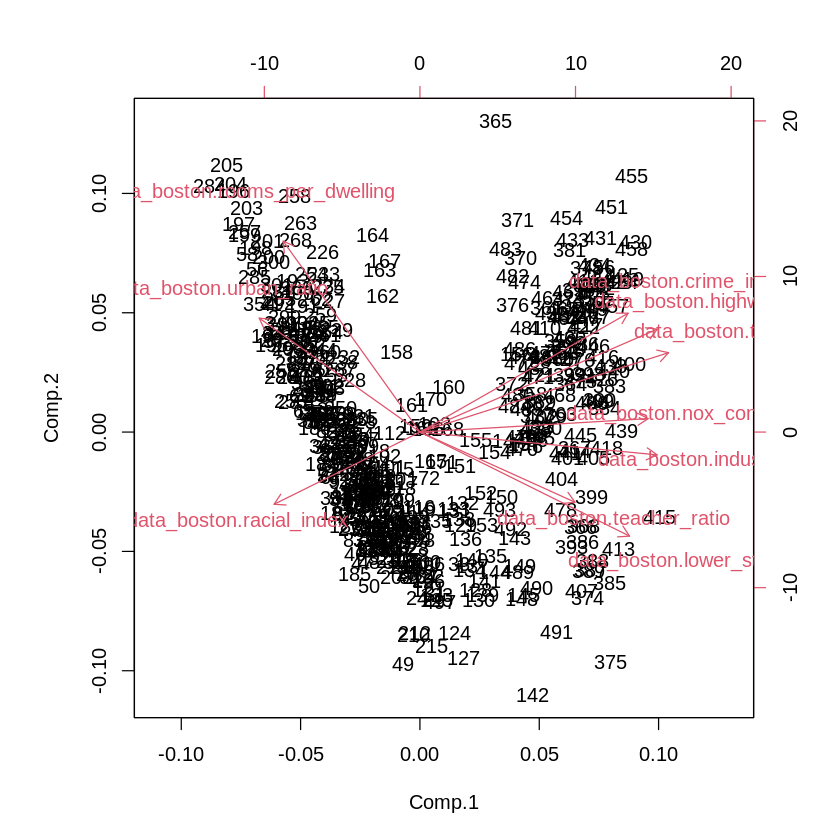

In [39]:
plot(acp)
biplot(acp)

Se ha sacado del analisis de correlación la variable boleana "c_river_variable" para tener solo variables continuas.
Se bserva que 4 componentes pueden describir el 80% de los datos aproximadamente.


In [40]:
loadings(acp)


Loadings:
                               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
data_boston.crime_index         0.328  0.372  0.145  0.114  0.241  0.580       
data_boston.urban_ratio        -0.253  0.357  0.116 -0.571  0.473 -0.374       
data_boston.industry_ratio      0.373        -0.195  0.199        -0.556  0.353
data_boston.nox_concentration   0.359        -0.425  0.236  0.115 -0.103       
data_boston.rooms_per_dwelling -0.215  0.598         0.374 -0.325 -0.300 -0.486
data_boston.highway_index       0.374  0.322  0.220                      -0.101
data_boston.tax_ratio           0.391  0.248  0.141         0.149 -0.210       
data_boston.teacher_ratio       0.244 -0.220  0.752        -0.327 -0.229       
data_boston.racial_index       -0.230 -0.226  0.290  0.581  0.660        -0.154
data_boston.lower_status        0.330 -0.326 -0.166 -0.291  0.160        -0.770
                               Comp.8 Comp.9 Comp.10
data_boston.crime_index         0.534  0.179        
dat

**OBSERVACIONES**:
- En total tenemos 10 componentes (= número de variables)

- El componente 1 agrupa un 51.5% de variación, y los valores absolutos más elevados son: Tax_ratio, highway_index, industry_ratio, nox_concentration, low_status, crime_index, urban_ratio

- El componente 2 agrupa un 13.0% de la variación, y los valores absolutos más elevados son : room_per_dwelling, crime_index, urban_ratio

- El componente 3 agrupa un 8.8% de la variación, y los valores absolutos más elevados son : teacher_ratio, nox_concentration

- El componente 4 agrupa un 8.1% de la variación, y los valores absolutos más elevados son : racial_index       , urban_ratio        

### <font color='#3d59c6'>  **3. Analysis of Variance (ANOVA)** </font>

COMPROVACIÓN DE SUPUESTOS
-Independencia en las muestras: Vamos a suponer que las muestras fueron tomadas de forma independiente sin depender de ninguna otra observación.

- Distribución normal por categorías

- Homocedasticidad entre grupos


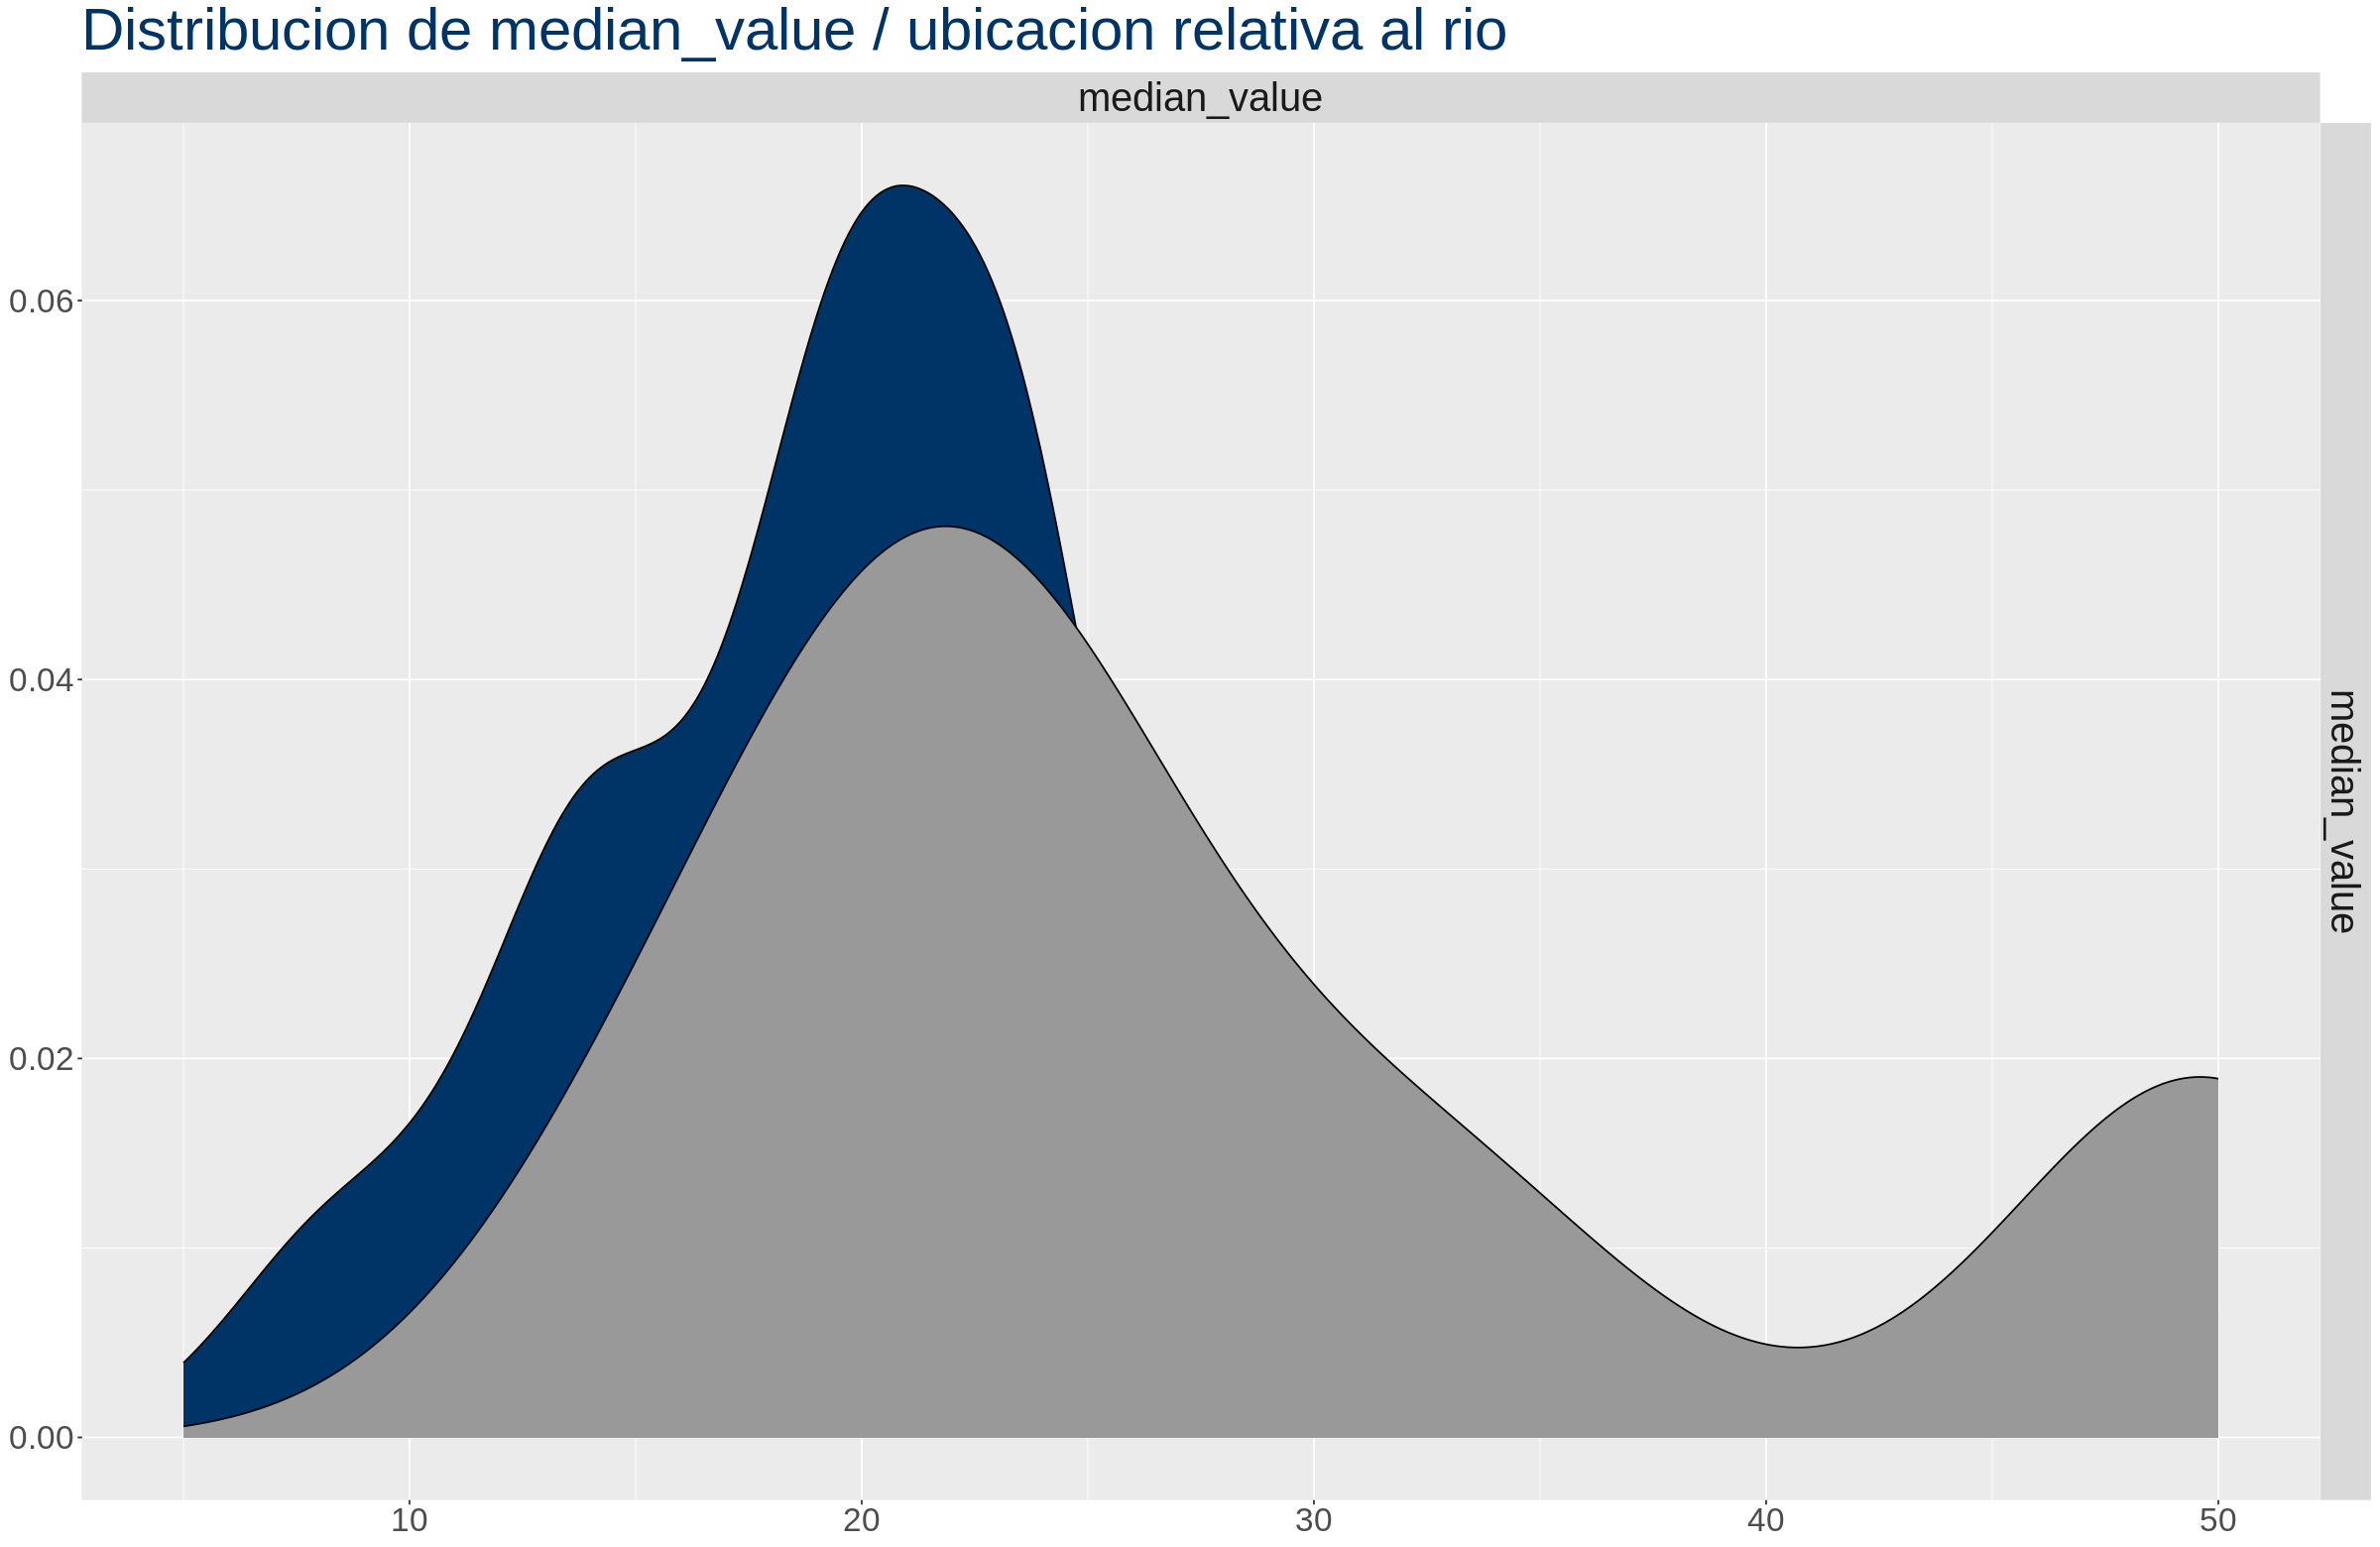

In [45]:
data_anova <- data_boston[, c('c_river_variable', 'median_value')]

options(
  repr.plot.width = 20,
  repr.plot.height = 13
)

ggpairs(data_anova,
        aes(color = as.factor(c_river_variable)),   # Color según la variable 'c_river_variable'
        title = "Distribucion de median_value / ubicacion relativa al rio",
        lower = list(continuous = ggally_smooth, combo = ggally_facethist, discrete = ggally_box),
        upper = list(continuous = ggally_cor),  # Agrega las correlaciones en la parte superior
        diag = list(continuous = ggally_densityDiag, discrete = ggally_barDiag),
        columns = 2:ncol(data_anova),  # Excluye la columna 'c_river_variable' de las columnas
        progress = FALSE) +
  theme(
    text = element_text(size = 30),
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 25),
    plot.title = element_text(color = "#003366")
  ) +
  scale_fill_manual(values = c("#003366", '#999999')) +
  scale_color_manual(values = c("#003366", '#999999'))


Visualmente se observa que la variable c_river_variable tiene influencia considerable sobre el valor medio de la vivienda.

### <font color='#3d59c6'>  >>Normalidad </font>

**Prueba estadística: **Prueba de Shapiro-wilk.

H0: La variable presenta una distribución normal

H1: La variable presenta una distribución no normal


p valor > 0.05: No rechazar H0

p valor < 0.05: Rechazar H0

In [50]:
variables = c('median_value')
categorias = c('0', '1')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(),
PValor = numeric(), row.names = NULL)
for (variable in variables) {
for (cat in categorias) {
data_subset = subset(data_anova, c_river_variable == cat)
result = shapiro.test(data_subset[, variable])
resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro =
result$statistic, PValor = round(result$p.value, 5)))
}
}
print(resultados)

       Variable Cat   Shapiro  PValor
W  median_value   0 0.9282612 0.00000
W1 median_value   1 0.8359233 0.00011


Los valores de p Valor no pasan la prueba de normalidad al ser p<0.05.

### <font color='#3d59c6'>  >>HOMOCEDASTICIDAD </font>
x
: H0 las muestras presentan varianzas iguales
: H1 las muestras presentan varianzas distintas

In [54]:
variables = c('median_value')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor
= numeric(), row.names = NULL)
for (variable in variables) {
resultado_bartlett = bartlett.test(get(variable) ~ c_river_variable, data = data_anova)
resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}
print(resultados_bartlett)


                         Variable Estadistico     PValor
Bartlett's K-squared median_value    6.315541 0.01196842


El valor p es 0.01, que es menor a 0.05. Por lo tanto, se rechaza la hipótesis nula de homogeneidad de varianzas y se concluye que hay evidencia de diferencias significativas en las varianzas de las muestras.

####Gráfico de Violín

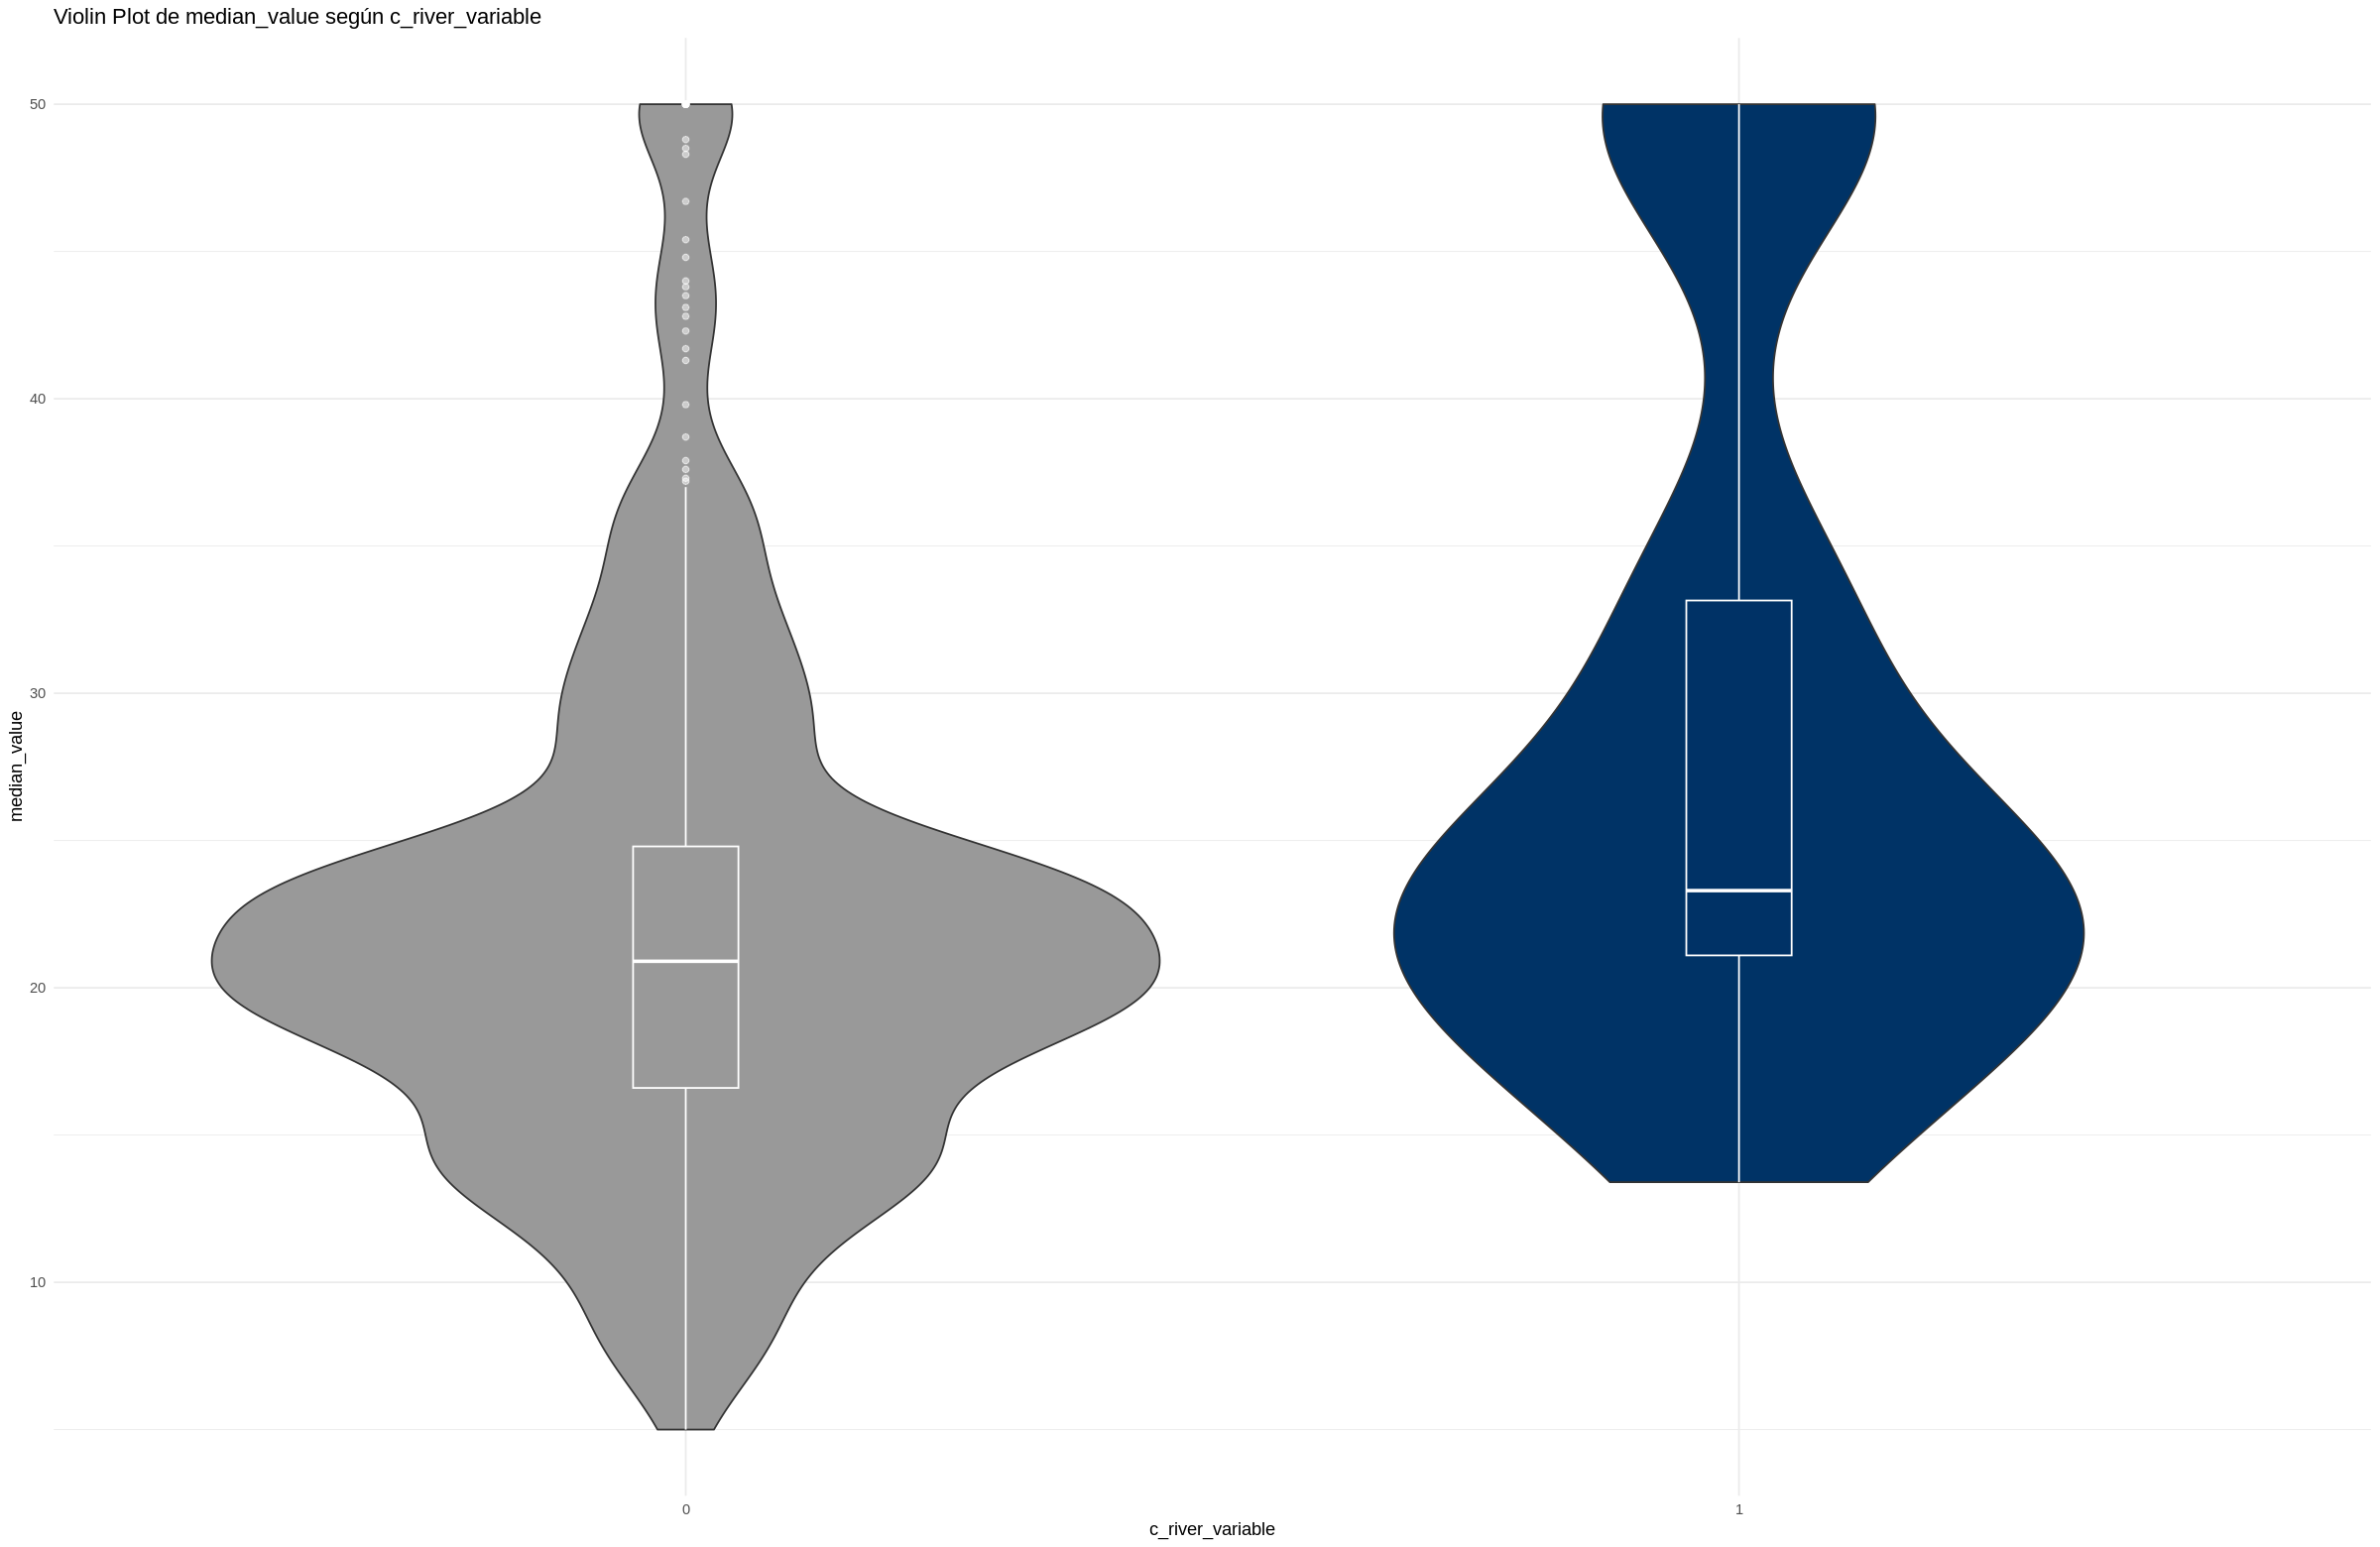

In [55]:
# install.packages("ggplot2")
# library(ggplot2)

# Crear un nuevo conjunto de datos con las variables deseadas
data_anova <- data_boston[, c('c_river_variable', 'median_value')]
data_anova$c_river_variable <- factor(data_anova$c_river_variable)

# Crear el gráfico de violín
ggplot(data_anova, aes(x = c_river_variable, y = median_value, fill = c_river_variable)) +
  geom_violin() +
  geom_boxplot(width = 0.1, color = "white", alpha = 0.5) +
  labs(title = "Violin Plot de median_value según c_river_variable",
       x = "c_river_variable",
       y = "median_value") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_manual(values = rev(c("#003366", '#999999')))

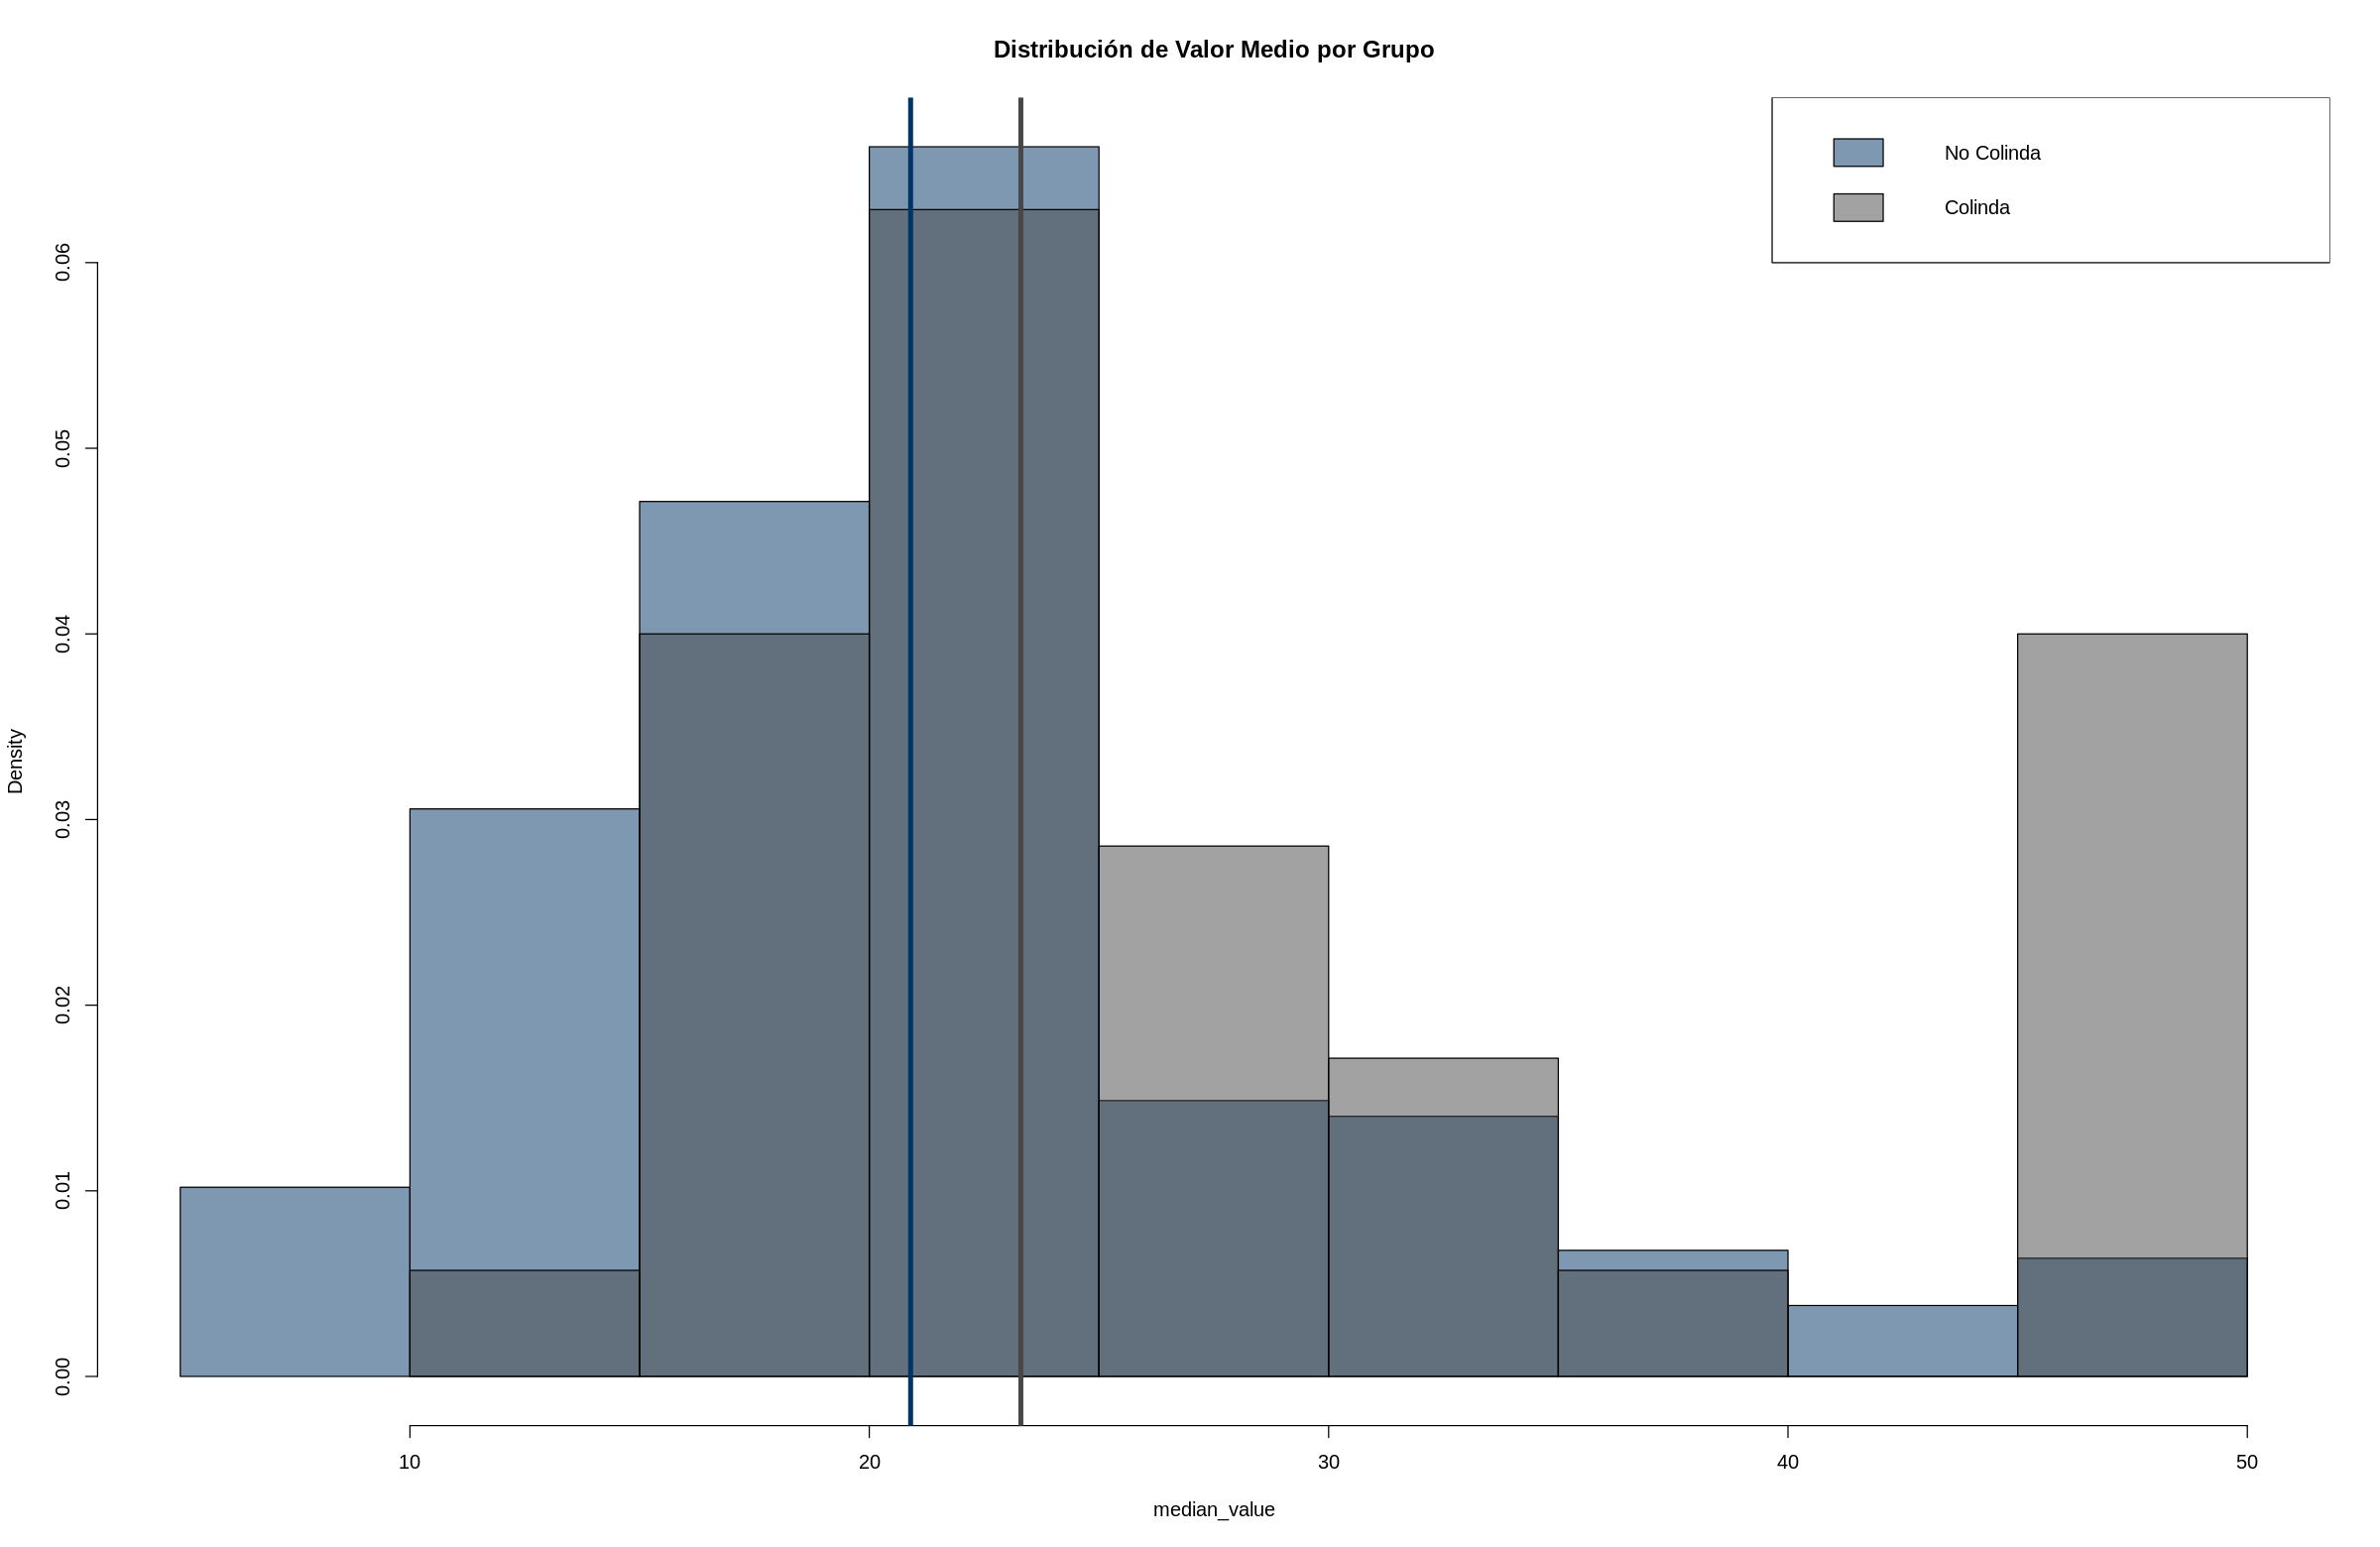

In [57]:
options(
  repr.plot.width = 20,
  repr.plot.height = 13
)

# Histograma probabilístico con la distribución 'median_value' por grupo 'c_river_variable'
hist(subset(data_anova, c_river_variable == '0')[,'median_value'],
     col = rgb(0/255, 51/255, 102/255, 0.5),
     main = 'Distribución de Valor Medio por Grupo',
     freq = FALSE,
     xlab = 'median_value')
hist(subset(data_anova, c_river_variable == '1')[,'median_value'],
     col = rgb(71/255, 71/255, 71/255, 0.5),
     add = TRUE,
     freq = FALSE)

# Leyenda
legend(x = "topright", legend = c('No Colinda', 'Colinda'), fill = c(rgb(0/255, 51/255, 102/255, 0.5), rgb(71/255, 71/255, 71/255, 0.5)))

# Mediana 'median_value' por grupo
abline(v = median(subset(data_anova, c_river_variable == '0')[,'median_value']), col = rgb(0/255, 51/255, 102/255, 1), lwd = 4)
abline(v = median(subset(data_anova, c_river_variable == '1')[,'median_value']), col = rgb(71/255, 71/255, 71/255, 1), lwd = 4)


Se observa una diferencia entre las distribuciones con c_river_variable. PAreciera que el valor medio aumenta si la propiedad colinda con rio.

In [60]:
anova = aov(median_value ~ c_river_variable, data = data_anova)
summary(anova)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
c_river_variable   1   1312  1312.1   15.97 7.39e-05 ***
Residuals        504  41404    82.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Los resultados del ANOVA indican si hay diferencias significativas en la variable objetivo debido al efecto de la variable categórica _river_variable. Tiene un valor de de F alto (15.97) y un p-valor es muy pequeño (7.39e-05), lo que sugiere que hay diferencias significativas entre al menos dos grupos definidos por c_river_variable.









### <font color='#3d59c6'>   **4.Desarrollo y justificación de las variables** </font>

Luego de utilizar correlaciones, PCA y ANOVA para analizar las variables dependientes y objetivo, se presentan las siguientes variables como las escogidas para generar el modelo.

Correlación: Variable Lower_status presentó la mayor correlación con la variable objetivo

PCA Components: rooms per dwelling, aunque la variable más significativa en el componente que tiene mas explicabilidad de la varianza fue tax_ratio, se ha escogido rooms_per_dwelling ya que es la variable más significativa en el componente 2 y aunque tiene muchos outliers, tiene una mejor distribución de los datos.

ANOVA c_river_variable, la variable categórica que tiene influencia directa sobre la variable objetivo

### <font color='#3d59c6'> **5. Estimación y Evaluación del Modelo:** </font>

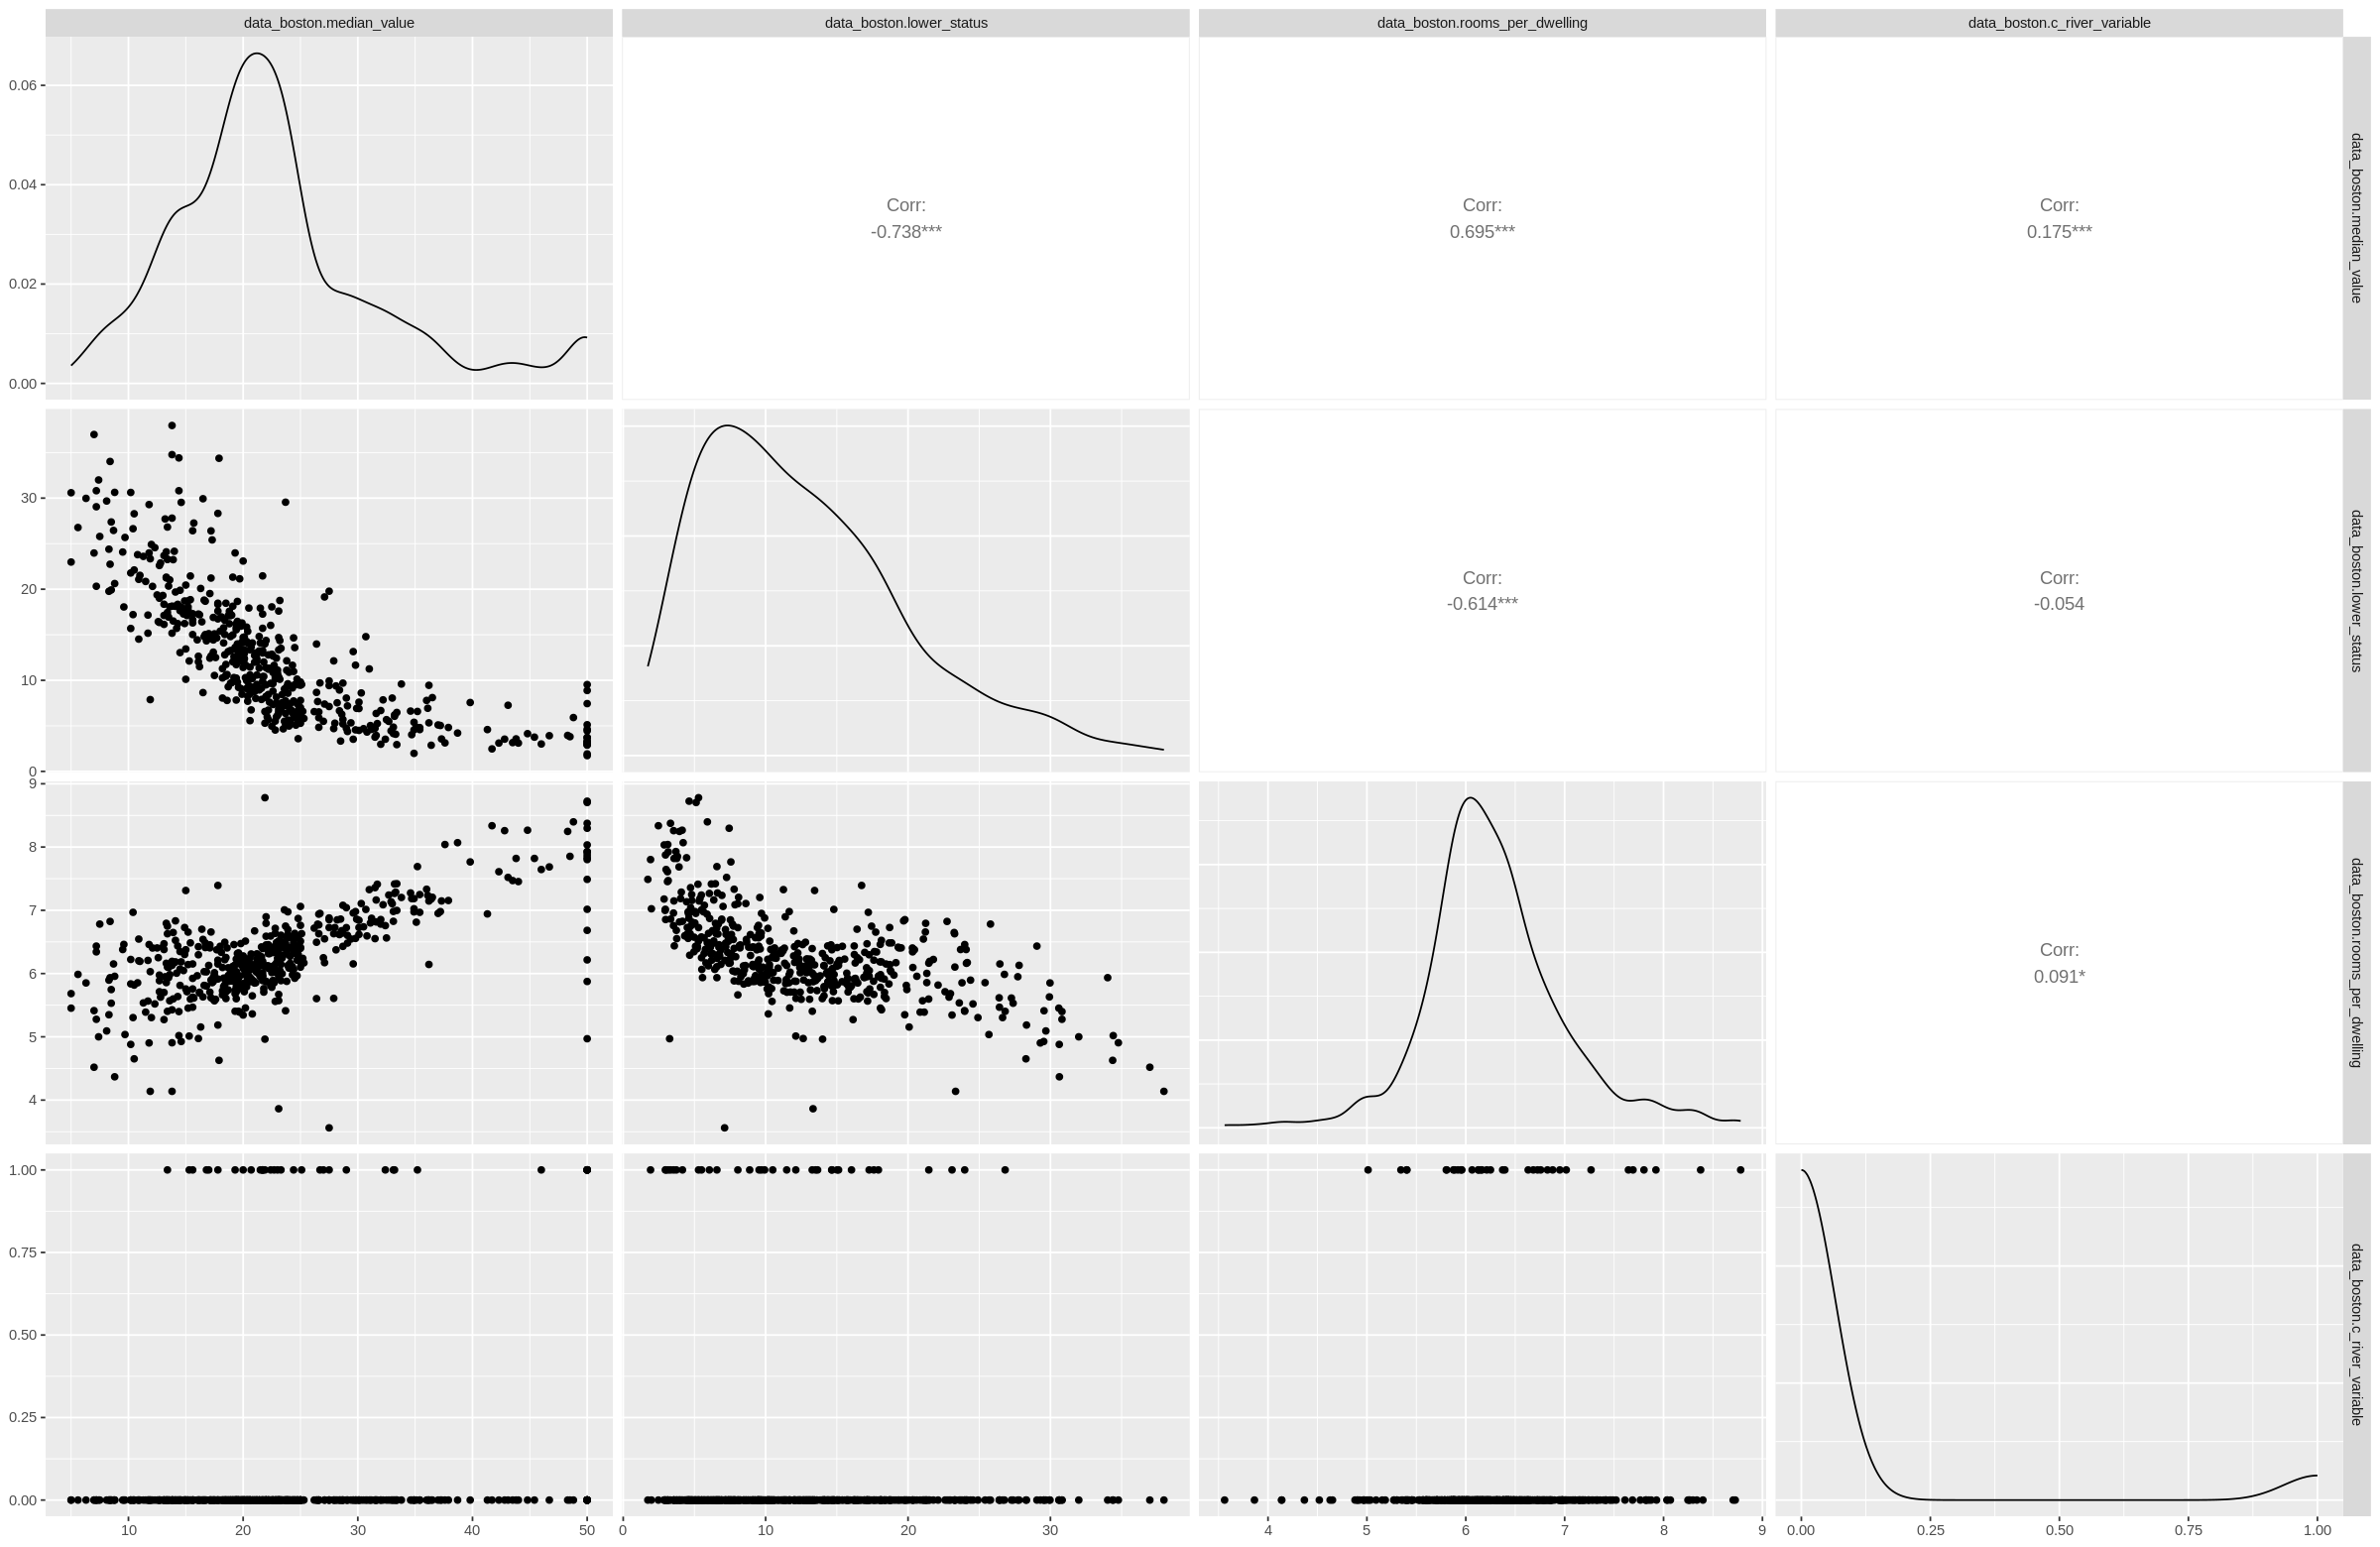

In [65]:
# Variables seleccionadas:
data_model = data.frame(data_boston$median_value
                              ,data_boston$lower_status
                              ,data_boston$rooms_per_dwelling
                              ,data_boston$c_river_variable
                        )
ggpairs(data_model)

In [66]:
data_boston_ml= data_boston
set.seed(123)
inTrain = createDataPartition(y = data_boston$median_value
                              ,p = 0.6
                              , list = FALSE
                              , times = 1) #Creamos una partición aleatoria de los datos para usar el 60% como train y el 40% como test

data_train  = data_boston_ml[inTrain, ] #separamos los datos según esta partición
data_test = data_boston_ml[-inTrain, ]

In [67]:
modelo_lm = lm(median_value ~ c_river_variable+lower_status+rooms_per_dwelling , data = data_train) # Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = median_value ~ c_river_variable + lower_status + 
    rooms_per_dwelling, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3130  -3.3859  -0.9163   2.0595  27.9735 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.62711    3.82640  -0.164  0.86993    
c_river_variable    3.49991    1.20458   2.905  0.00394 ** 
lower_status       -0.68263    0.05638 -12.108  < 2e-16 ***
rooms_per_dwelling  5.00584    0.53530   9.351  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.484 on 302 degrees of freedom
Multiple R-squared:  0.6634,	Adjusted R-squared:  0.6601 
F-statistic: 198.4 on 3 and 302 DF,  p-value: < 2.2e-16


### <font color='#3d59c6'>  COMPROBAMOS EL RESTO DE SUPUESTOS: </font>


### <font color='#3d59c6'>  ***Normalidad:*** </font>


	Shapiro-Wilk normality test

data:  modelo_lm$residuals
W = 0.92326, p-value = 1.97e-11



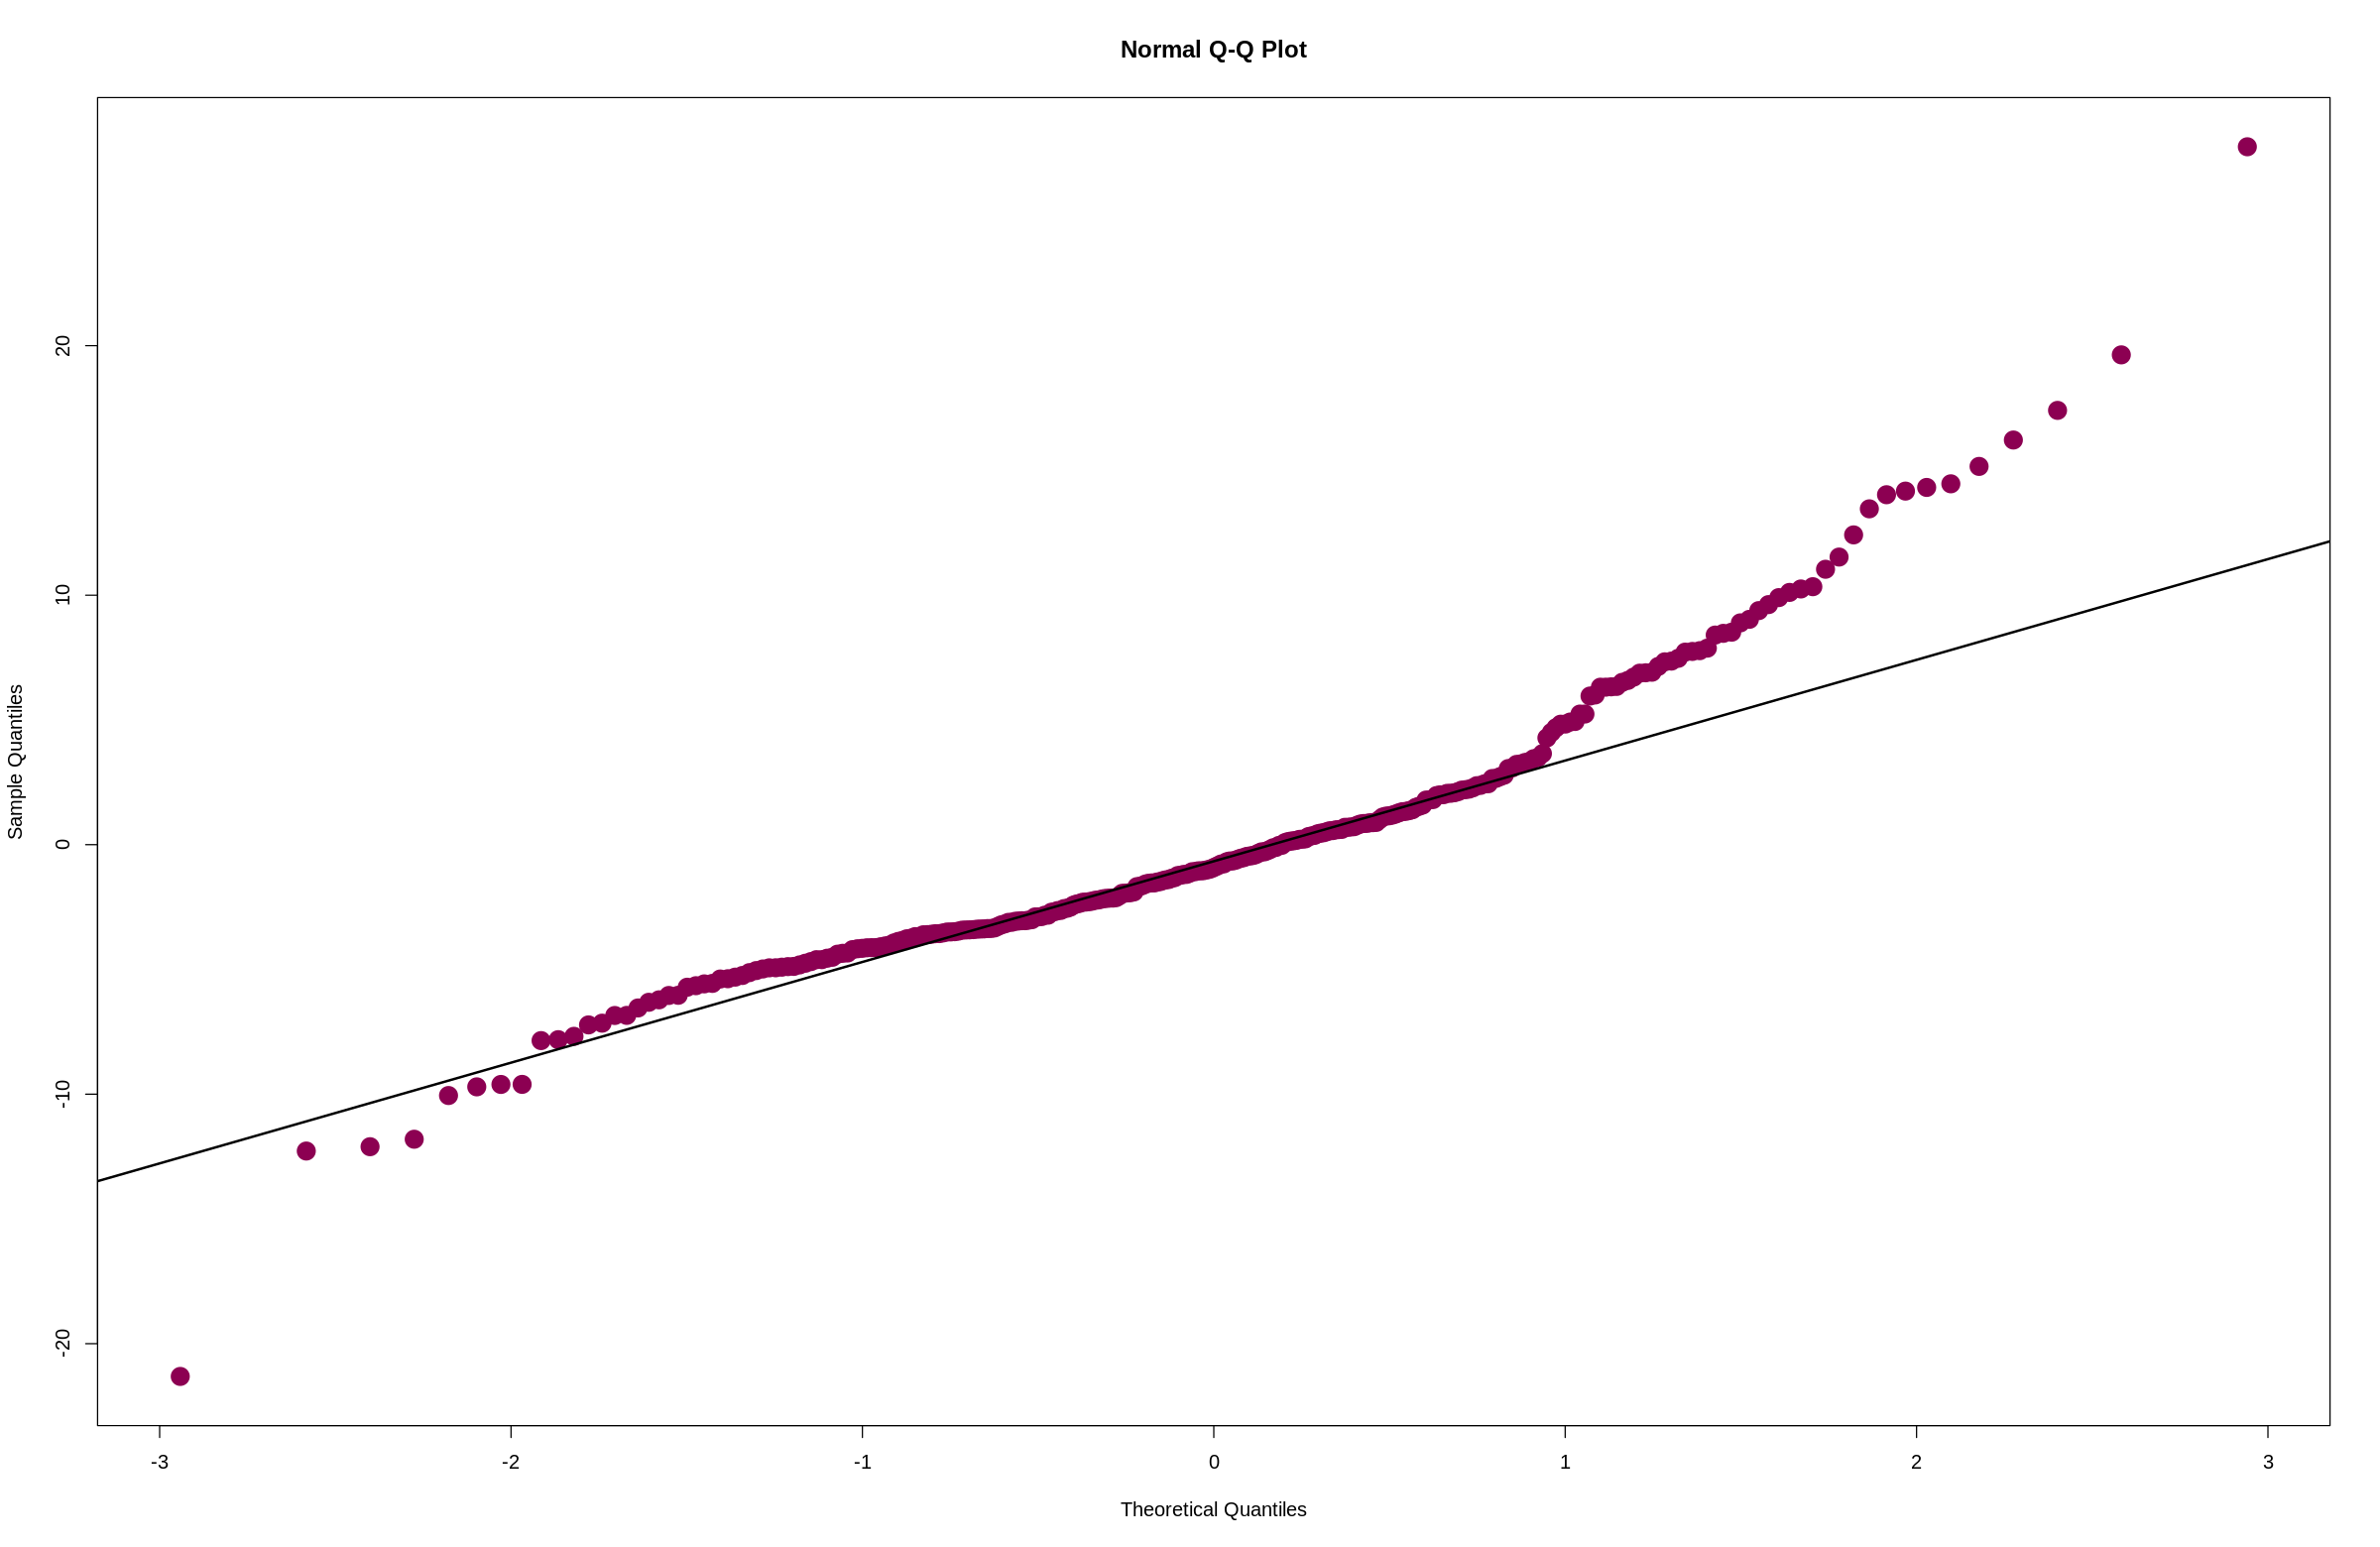

In [81]:
# QQplot
qqnorm(modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)
qqline(modelo_lm$residuals, col = "black", lwd = 2)

# Realizamos el test de Shapiro
shapiro_test <- shapiro.test(modelo_lm$residuals)
print(shapiro_test)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_lm$residuals
D = 0.11474, p-value = 1.922e-10


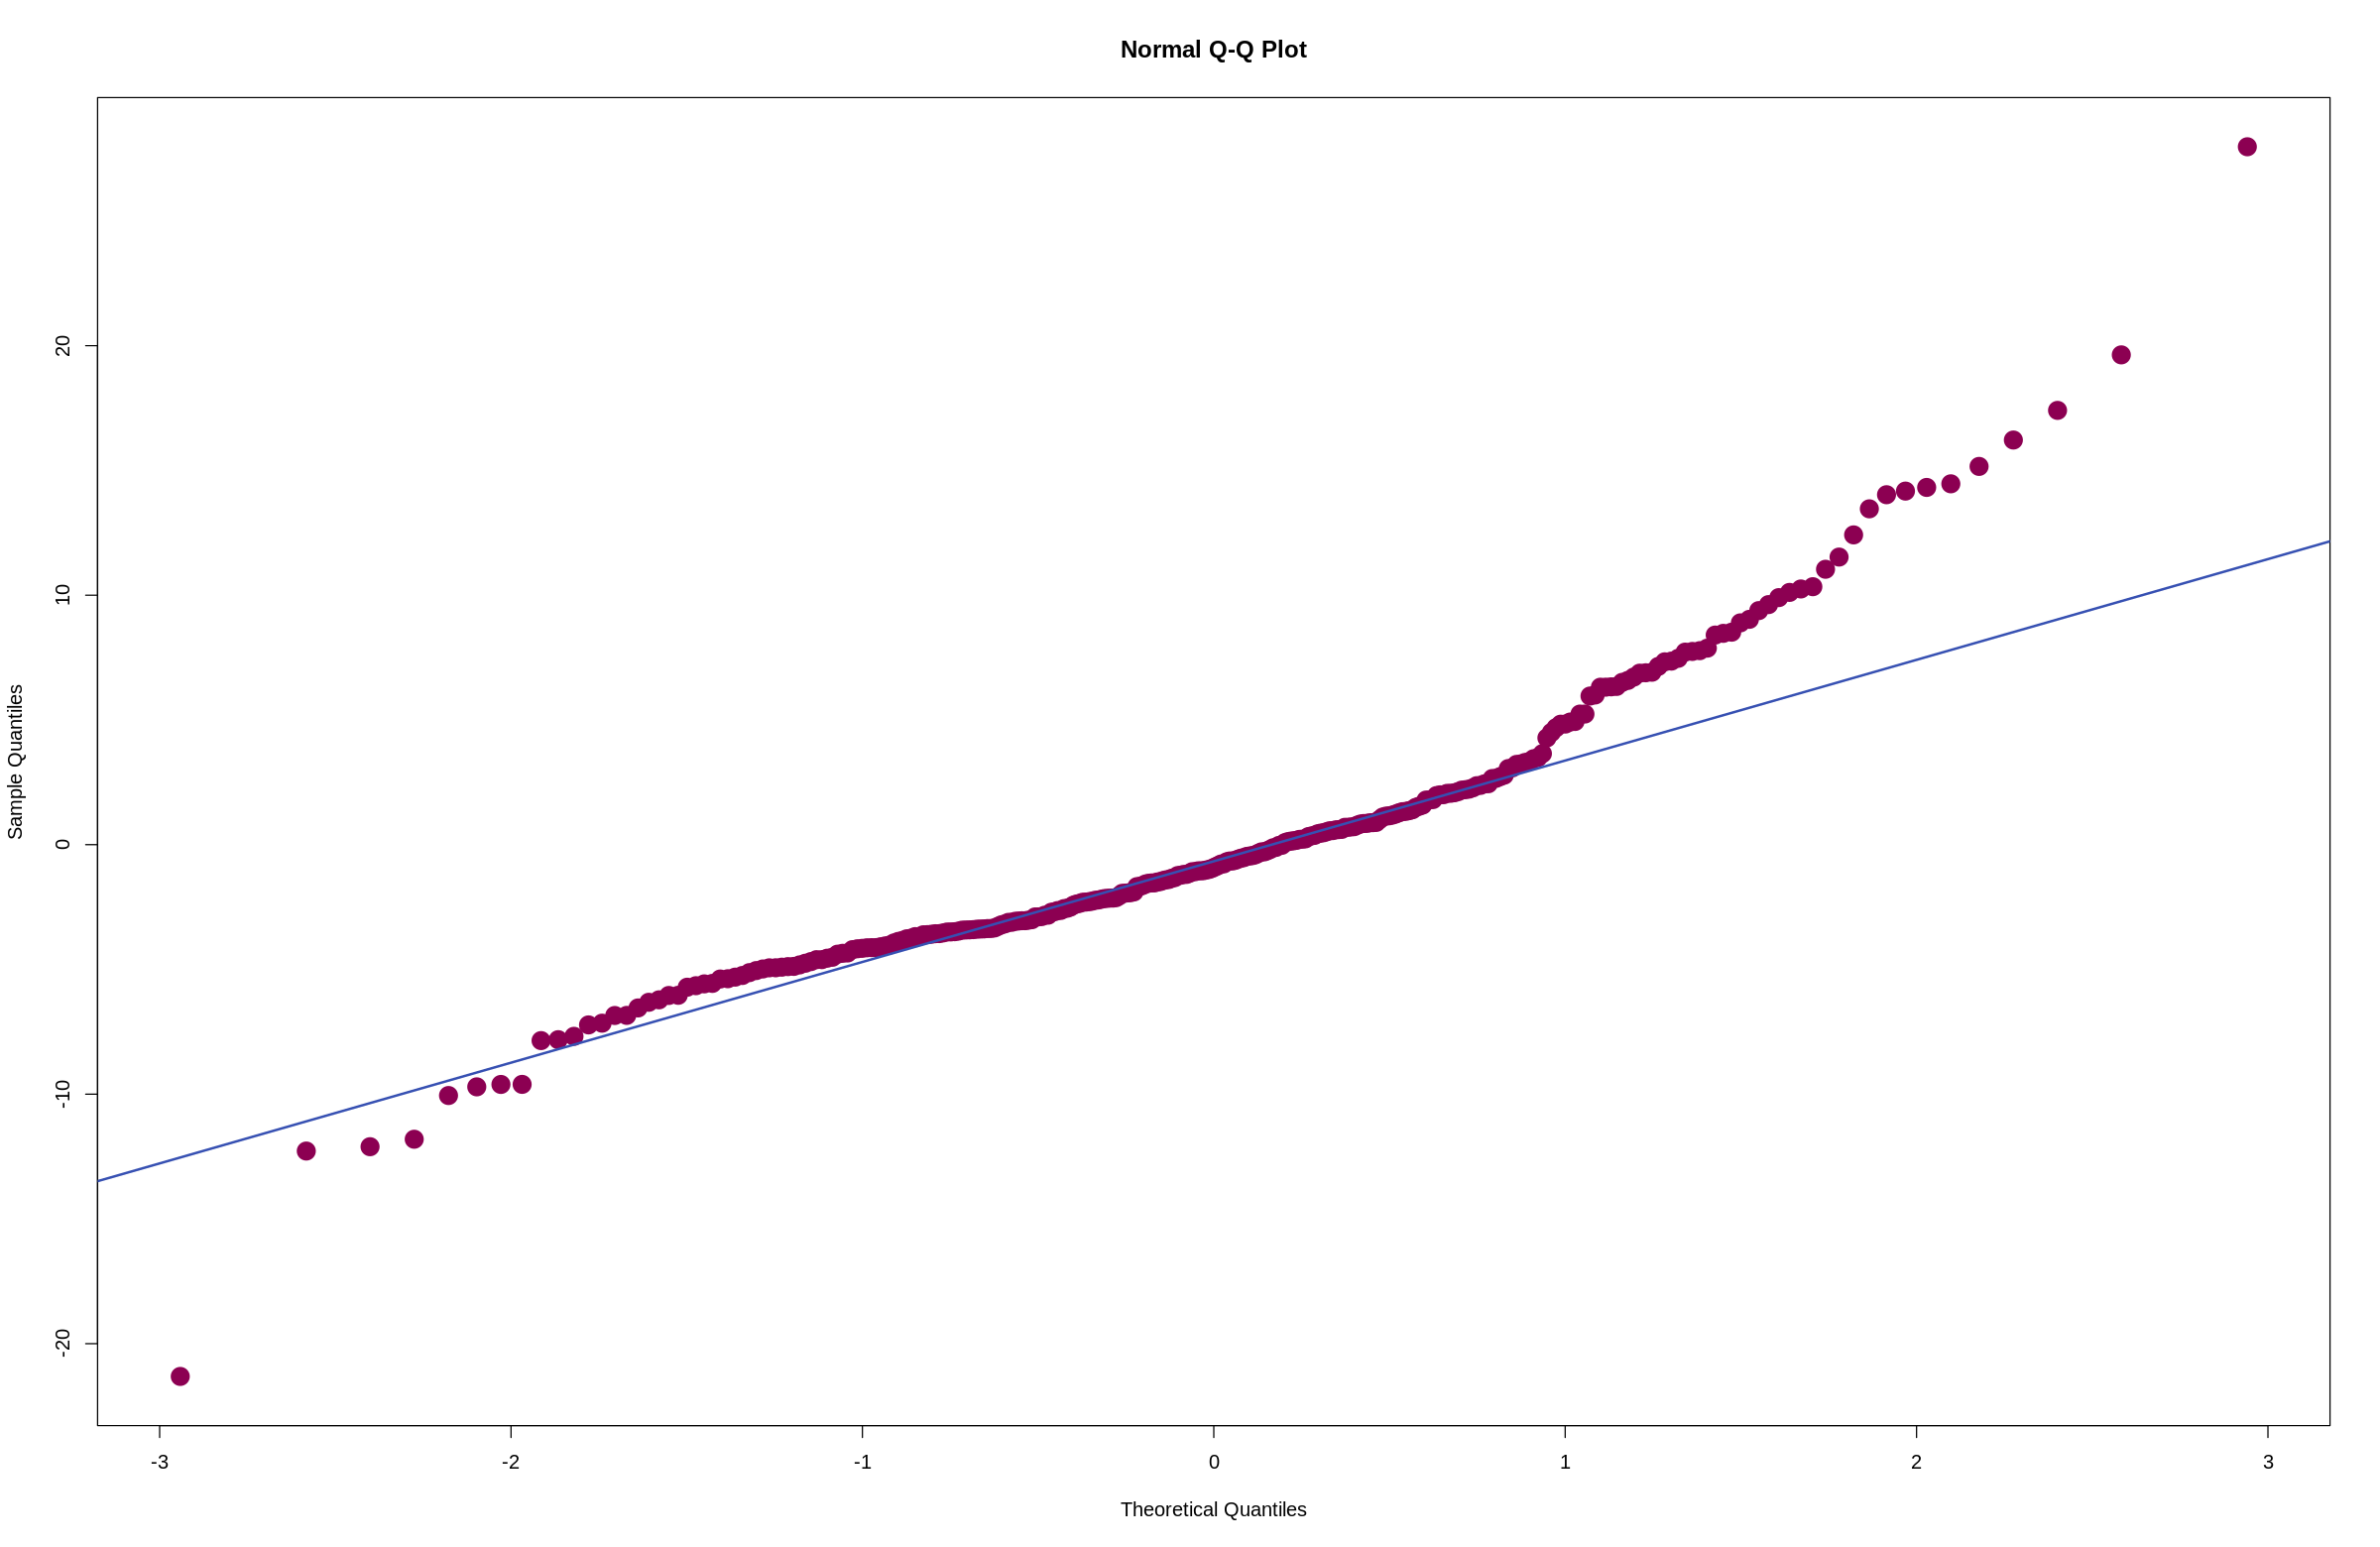

In [69]:
# Visualization
qqnorm(modelo_lm$residuals,pch =19,col ="#8c0052", cex=2)
qqline(modelo_lm$residuals , col = "#3650b2", lwd = 2 )

# Statistical Test
lillie.test(modelo_lm$residuals)

Los test de Shapiro-Wilk y Lilliefors indican que los residuos del modelo no se distribuyen normal.

### <font color='#3d59c6'>  ***Homocedasticidad:*** </font>

- Visualización: Residuos vs valores ajustados.

- Prueba estadística: la prueba de Breusch Pagan


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 7.1576, df = 3, p-value = 0.06704


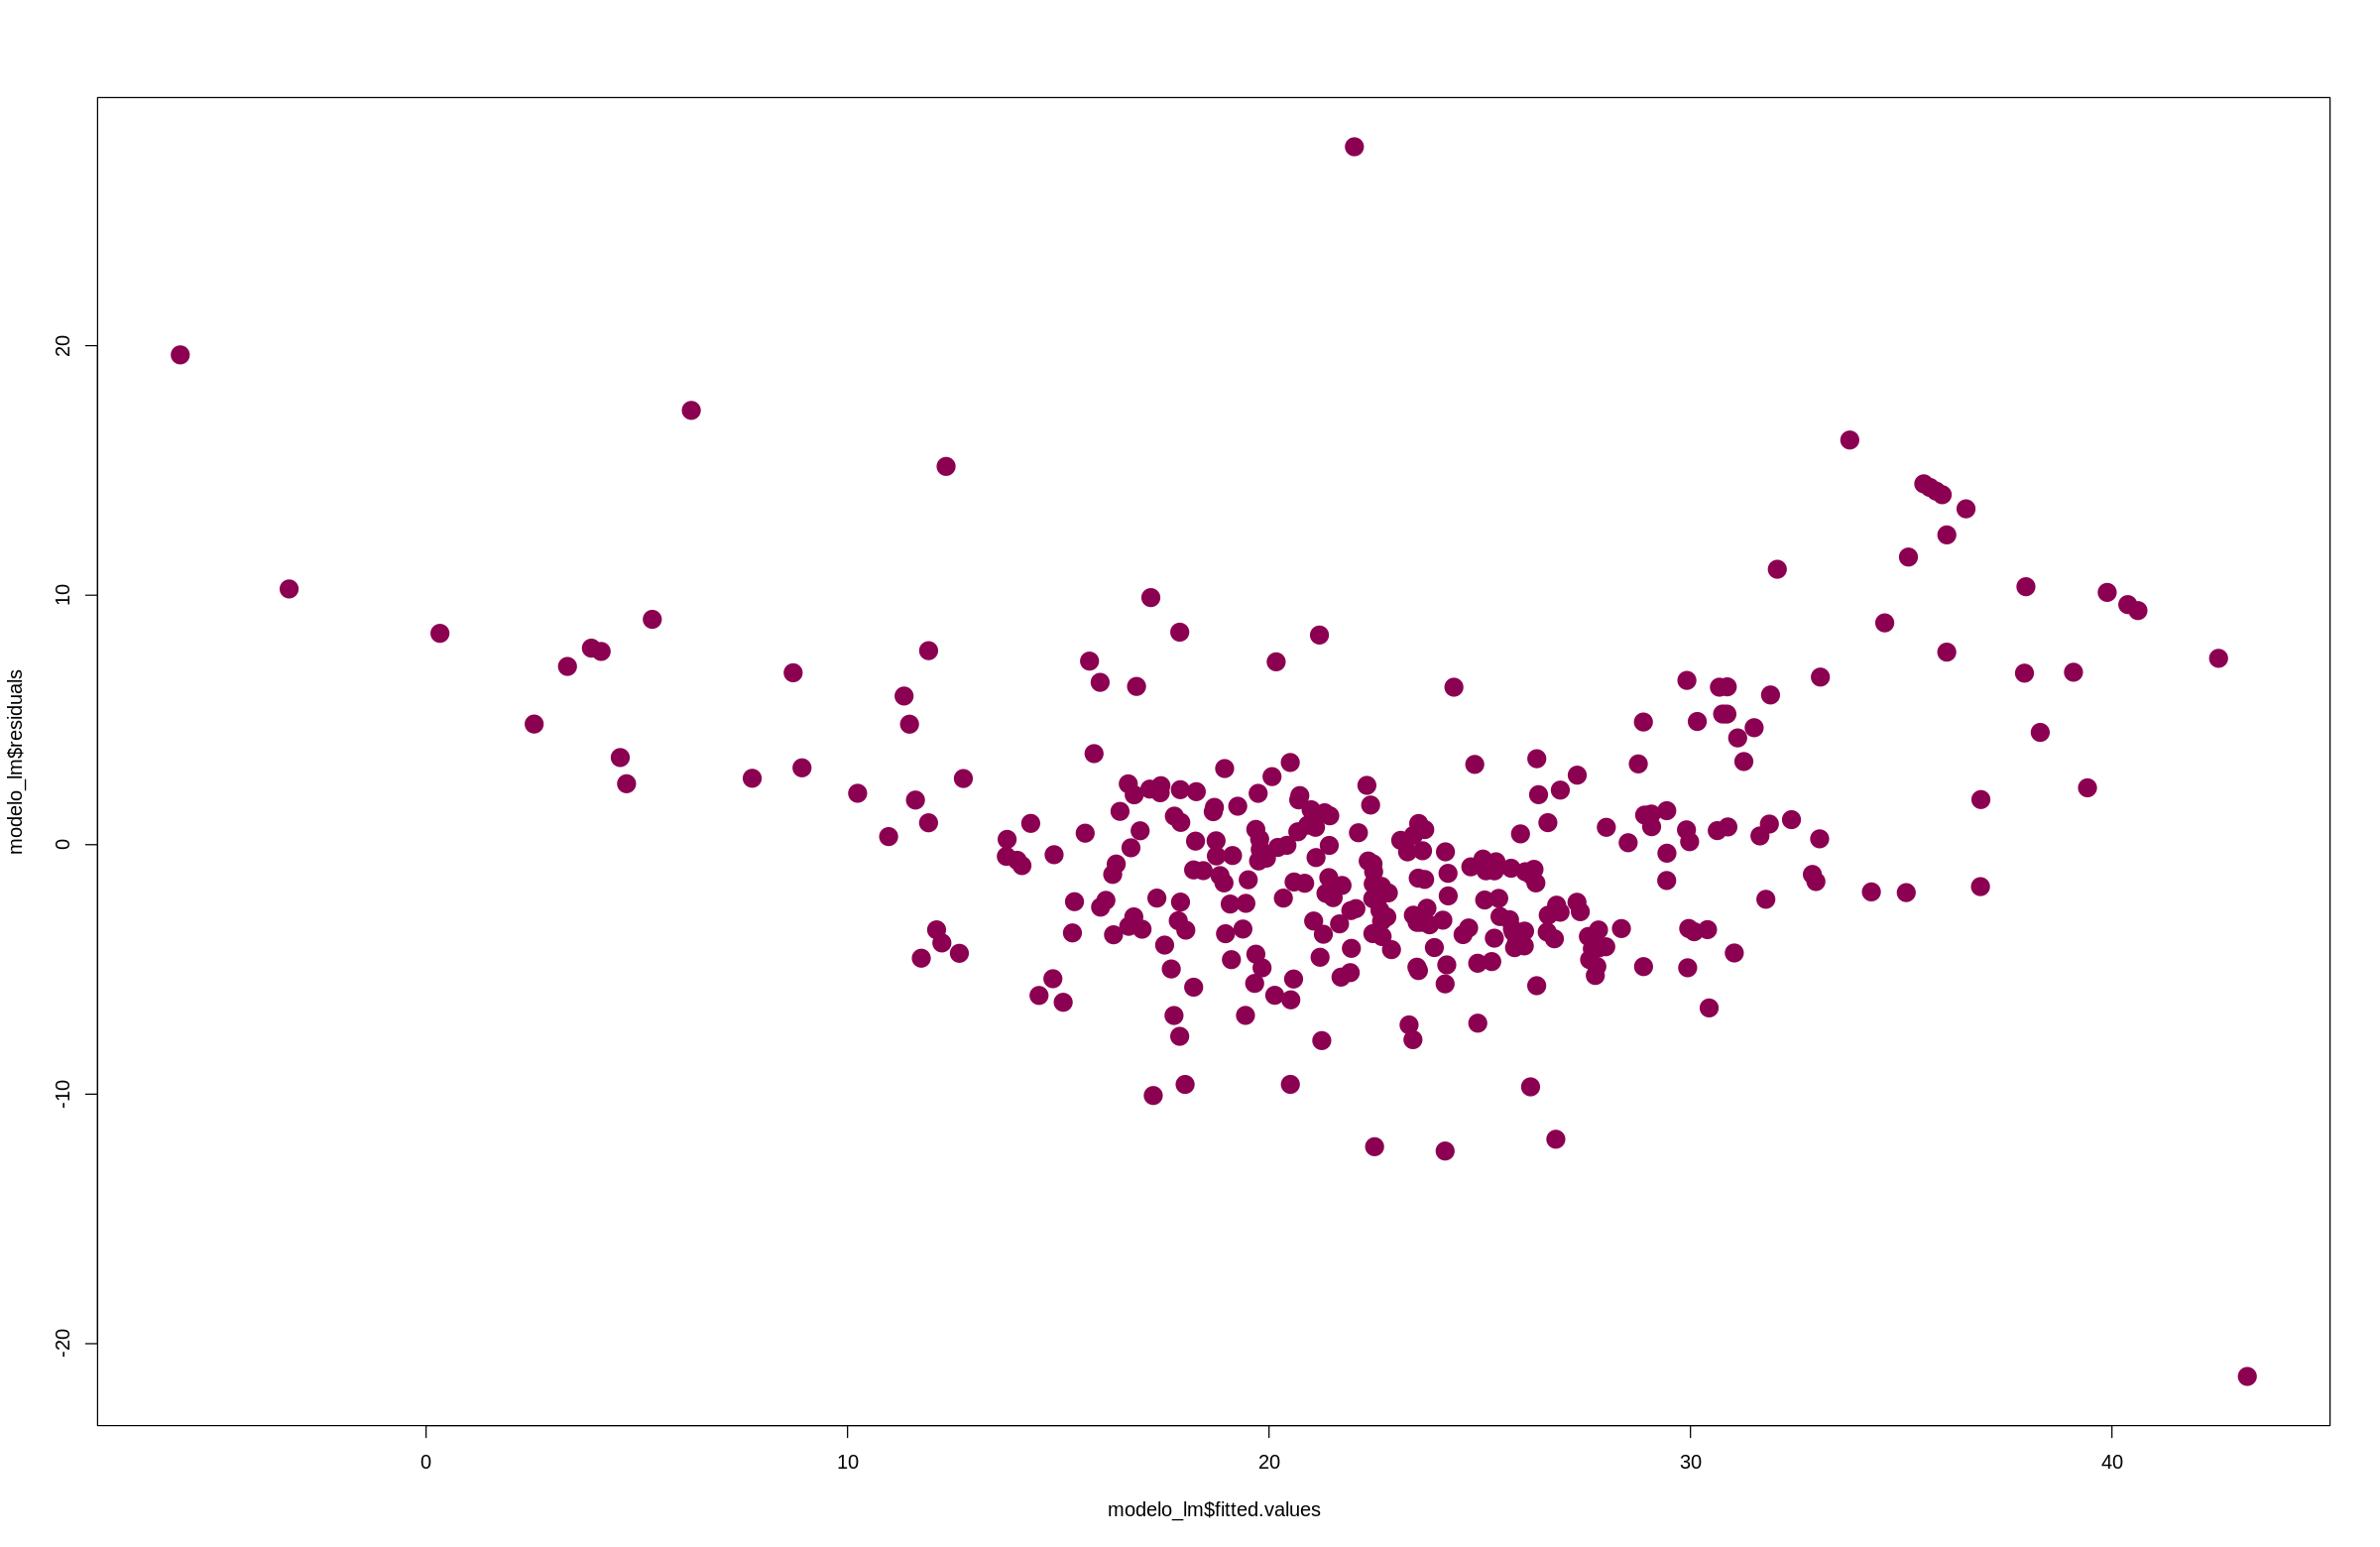

In [73]:
# Visualization
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#8c0052", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm)

Un p-value de 0.06704 > 0.05 indica que la homocedasticidad es aceptada

### <font color='#3d59c6'>  ***Autocorrelación:*** </font>

- Visualización: Residual vs Orden de toma de observaciones.
- Prueba estadística: la prueba de Durbin-Watson.


	Durbin-Watson test

data:  modelo_lm
DW = 1.0982, p-value = 1.242e-15
alternative hypothesis: true autocorrelation is not 0


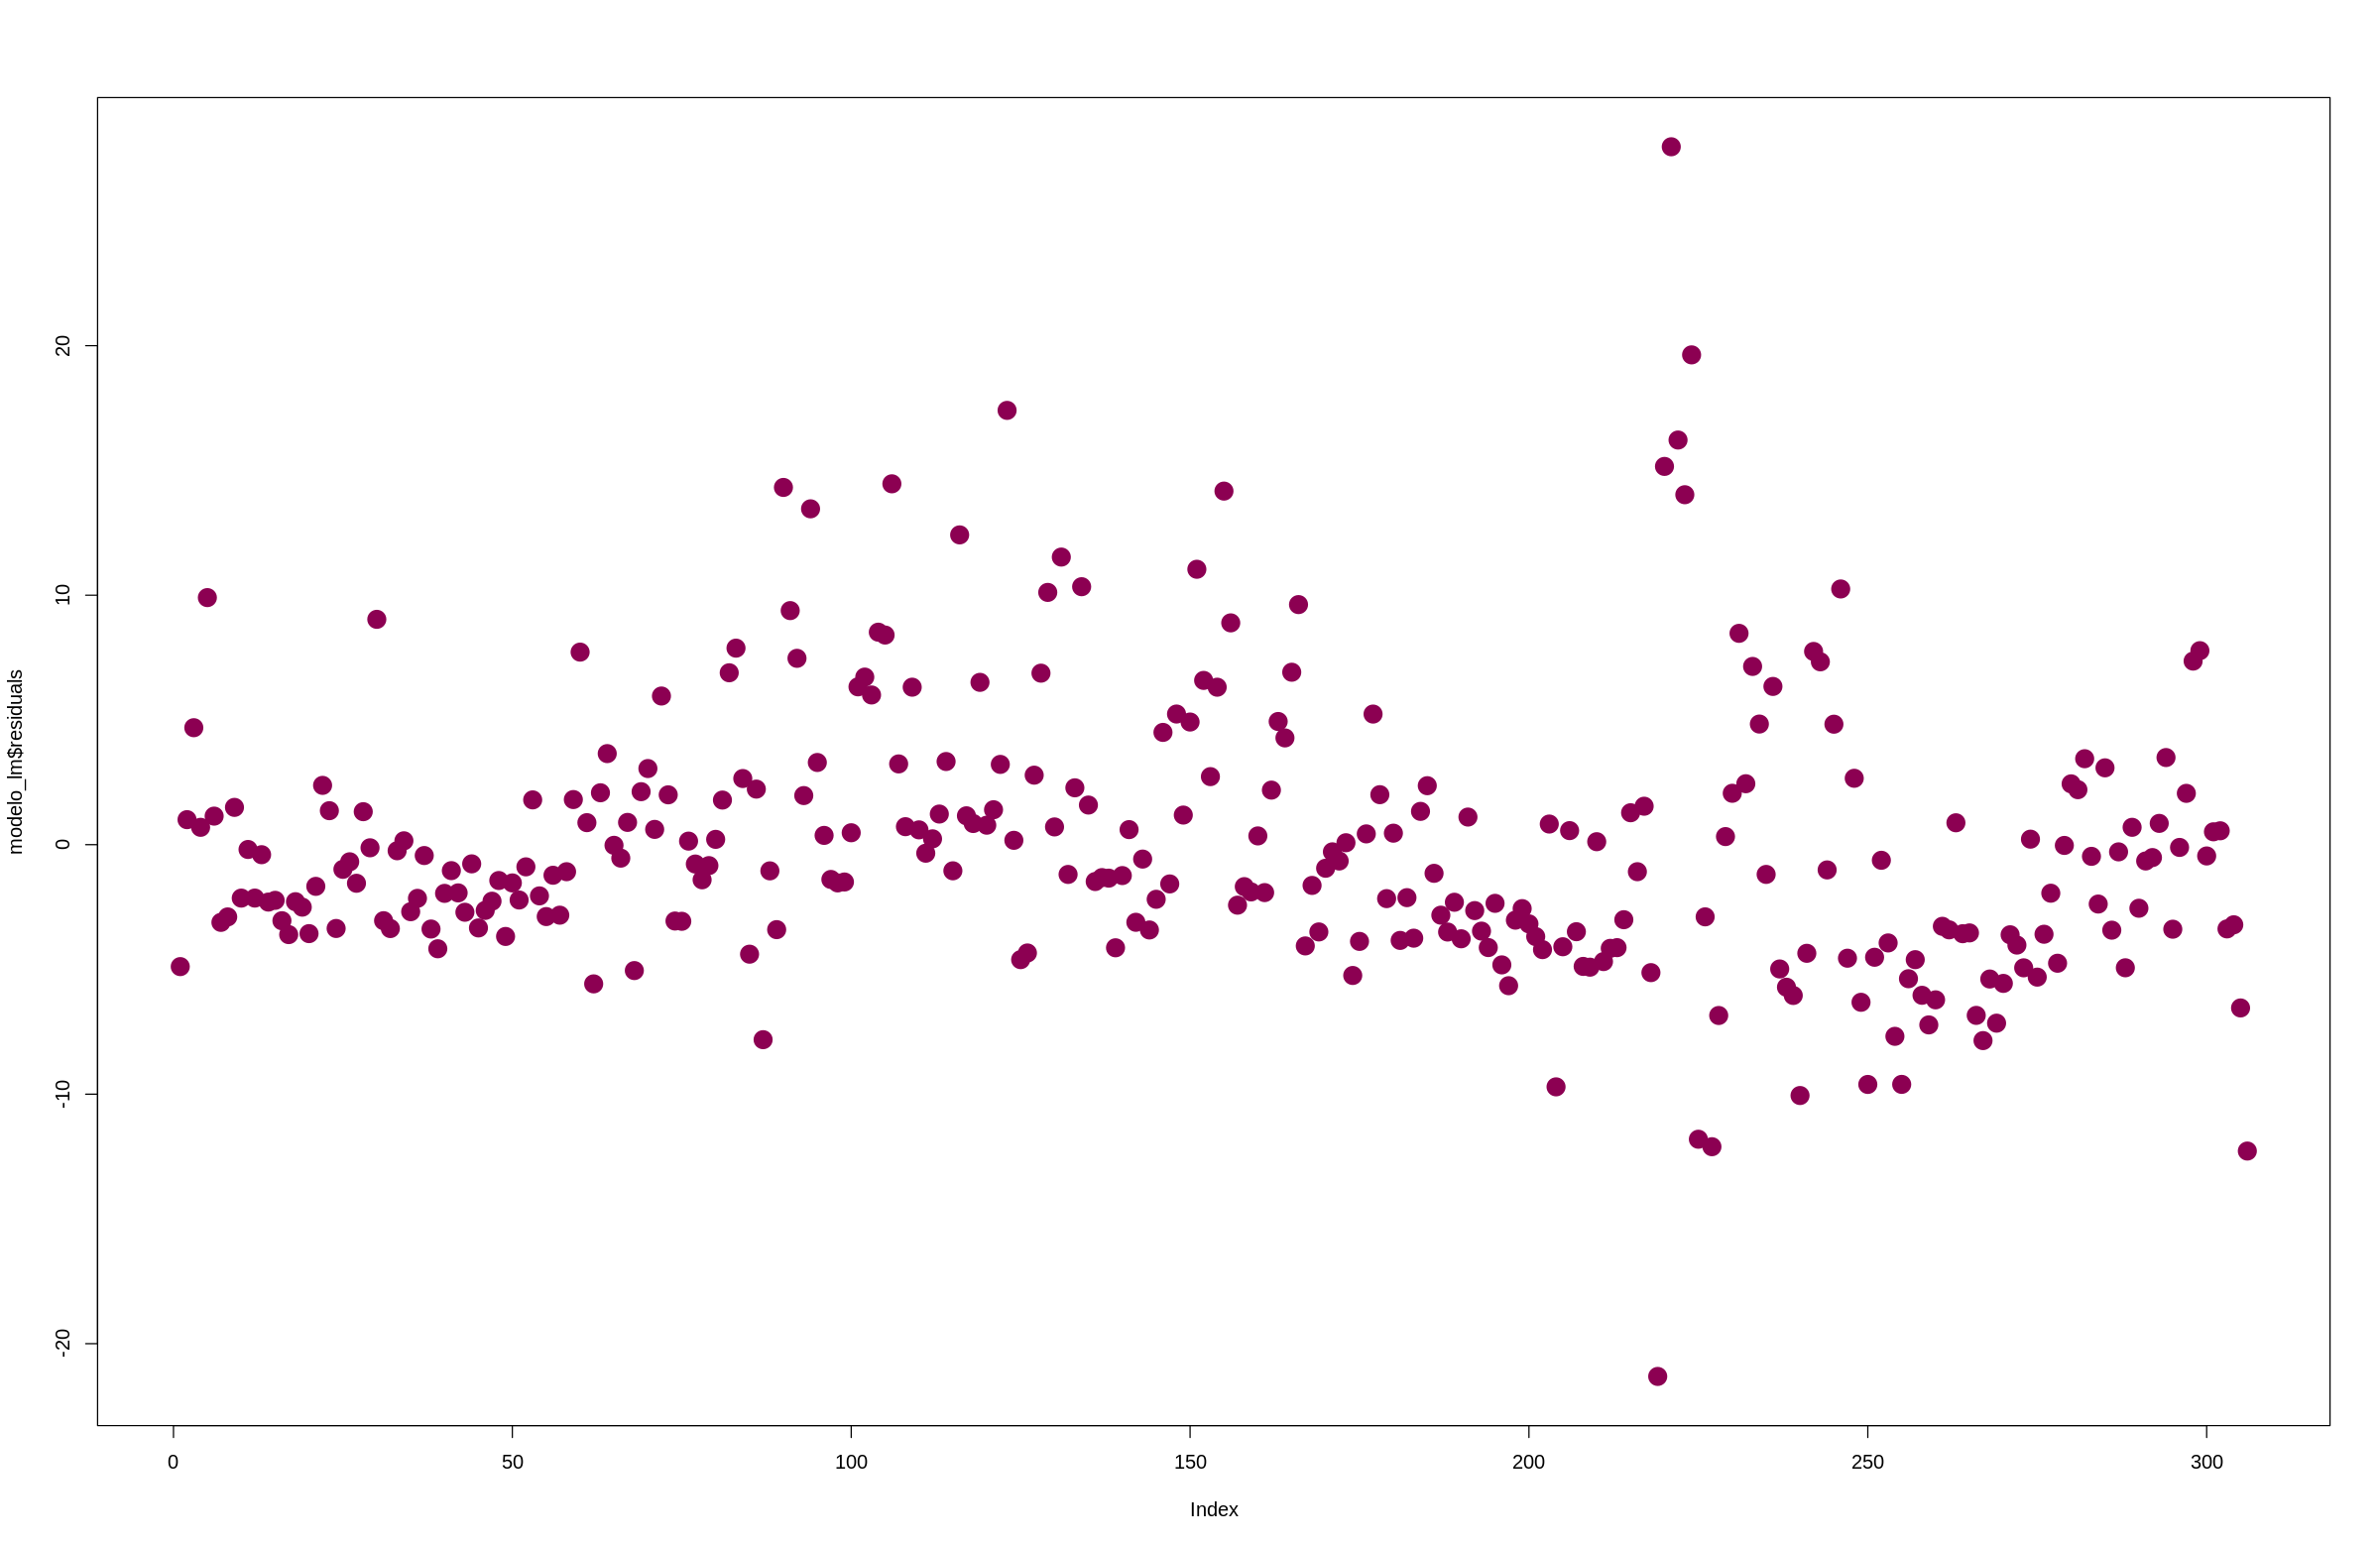

In [80]:

# Visualization
plot(modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)

# Statistical Test
dwtest(modelo_lm, alternative = "two.sided")

La autocorrelación de los residuos no es cero, son independientes.

### <font color='#3d59c6'>  ***Media de errores:*** </font>

In [76]:
mean(modelo_lm$residuals)

[1] -8.59255e-17

### <font color='#3d59c6'>  ***Detección de Outliers:*** </font>

Una tarea más es detectar si hay algún Outlier en el conjunto de datos dado. Porque si hay un Outlier, el resultado obtenido anteriormente no será confiable. Por tanto, existe la necesidad de detectar un Outlier.

Visualización y Prueba estadística: la **Distancia de Cook** (estima la influencia de un punto en la regresión)

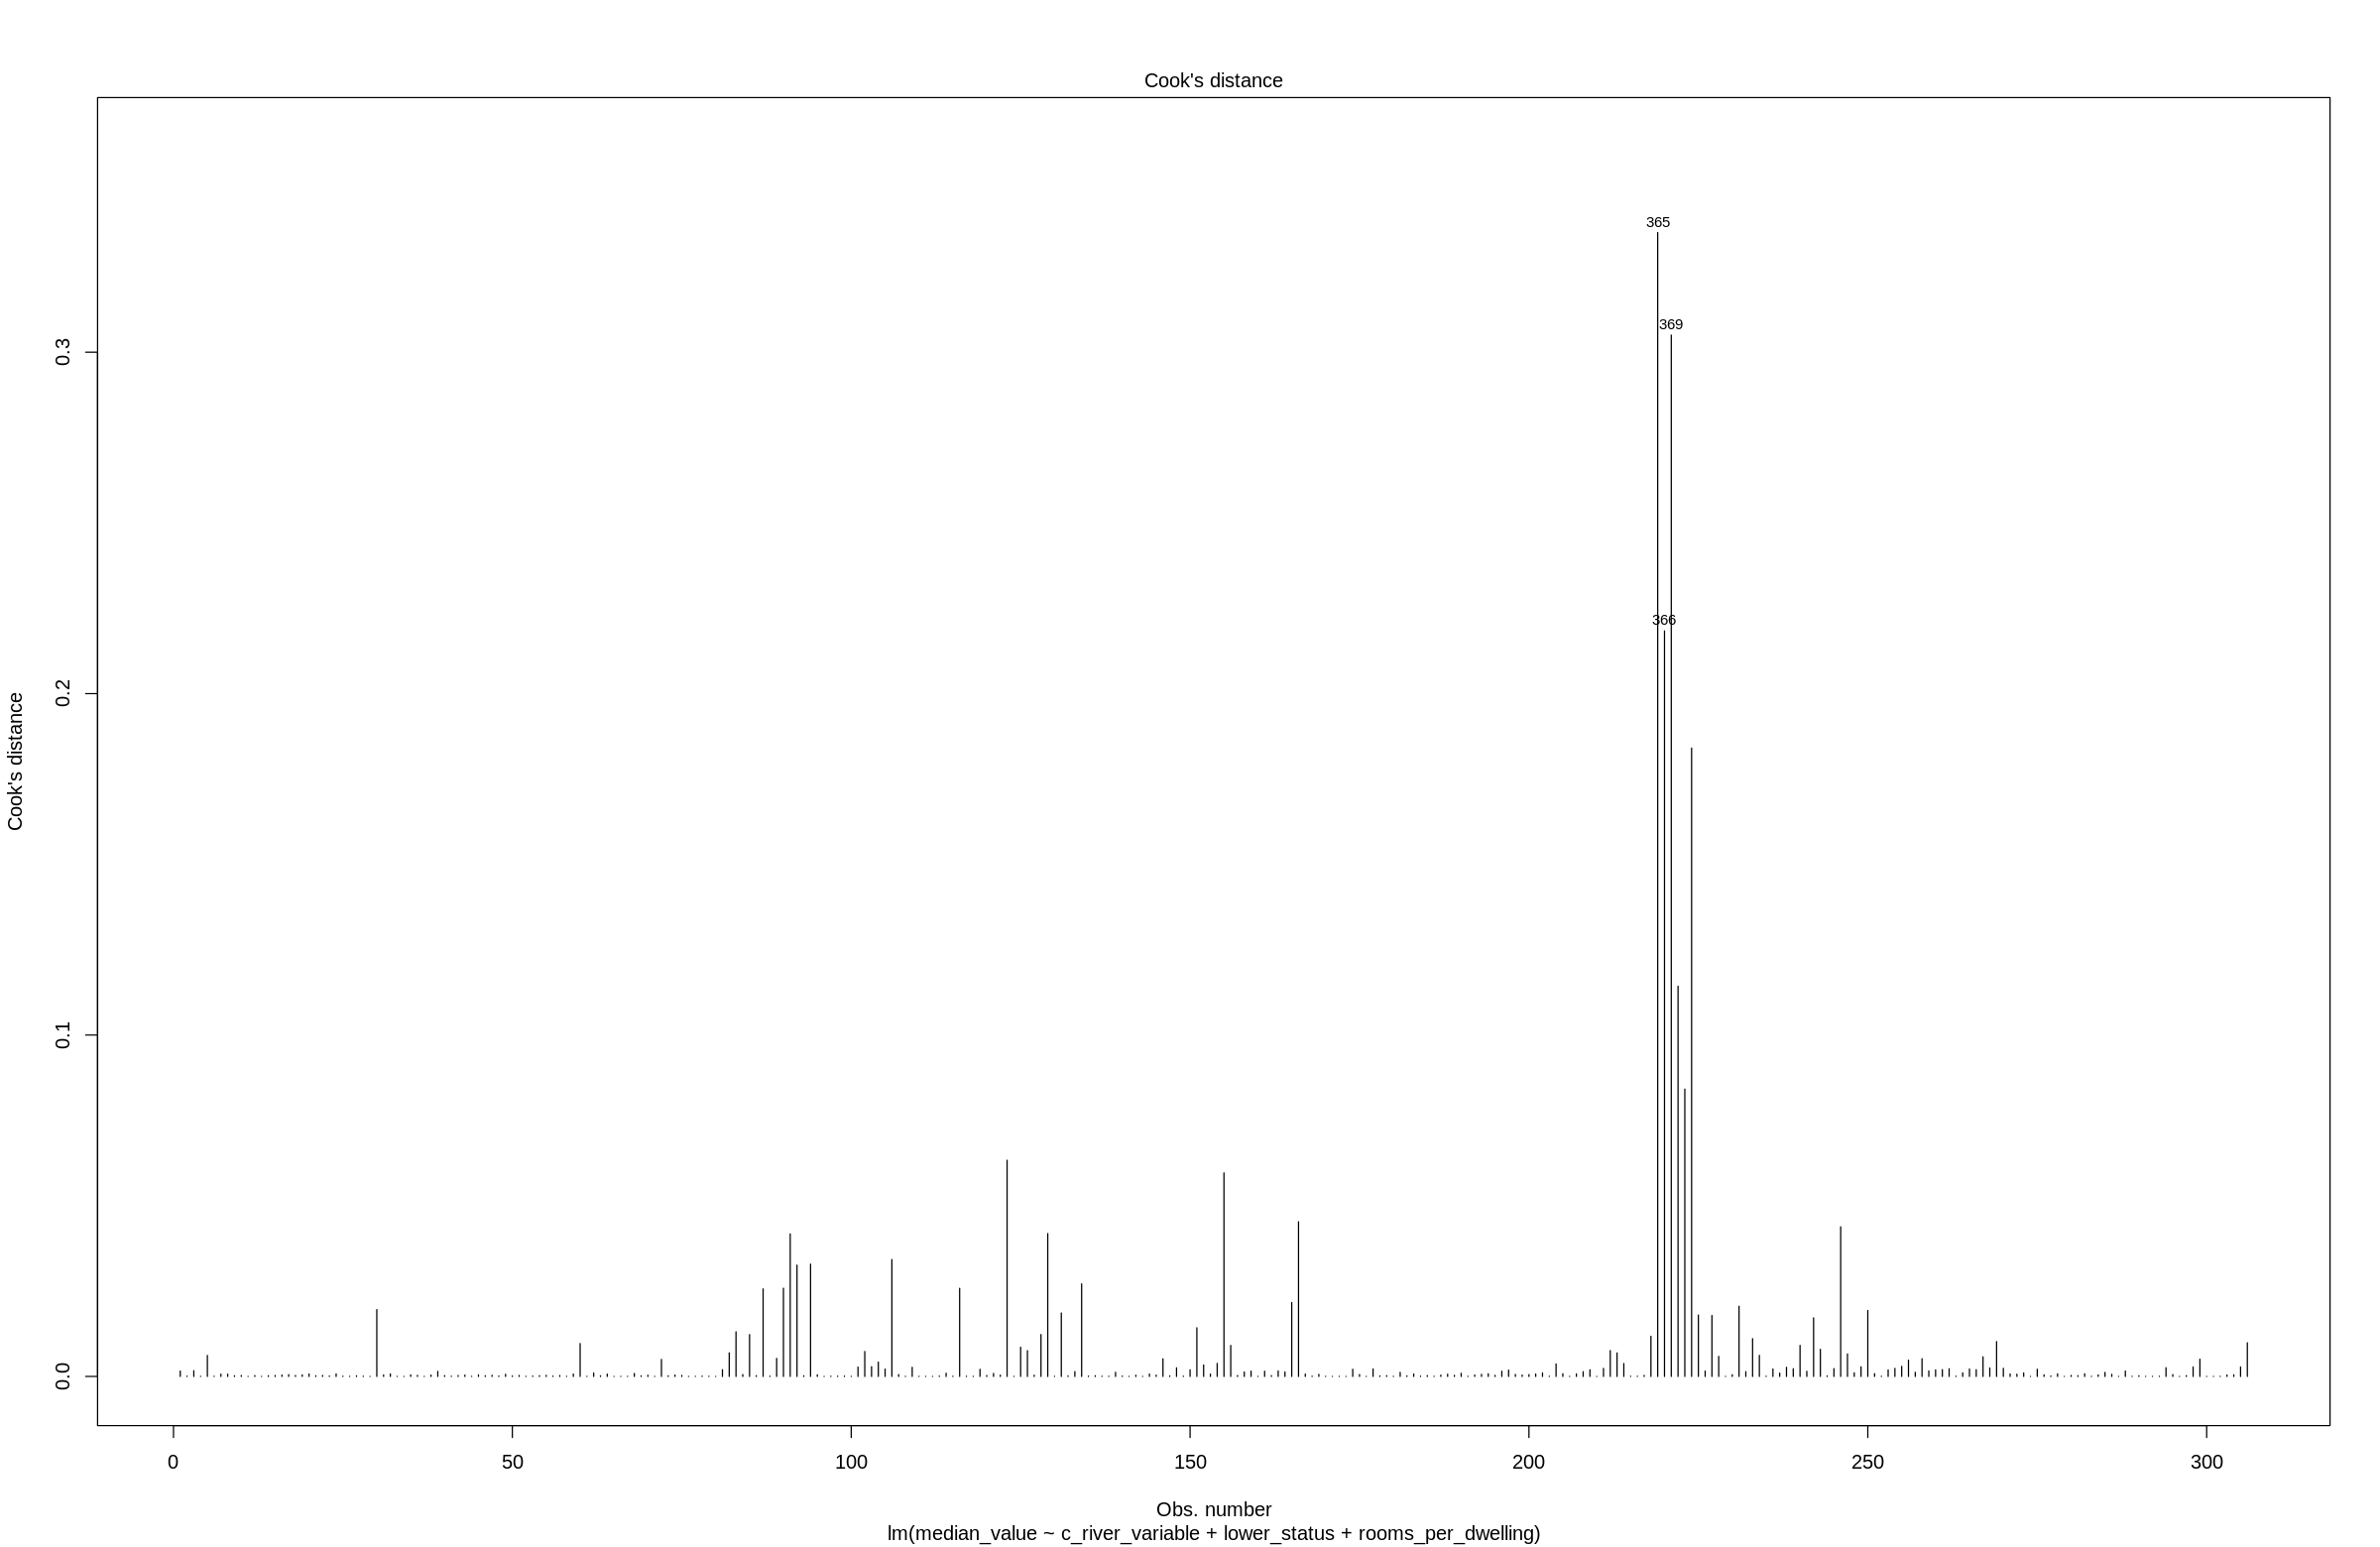

In [77]:
# Visualization (Cook's distance plot)
plot(modelo_lm , 4)

## <font color='#3d59c6'>  PREDICCIONES </font>

El modelo de regresión lineal simple está listo.

A partir del conjunto de datos TEST verificamos el rendimiento ya que es un conjunto de datos "ciego", es decir, determina qué tan bien funcionará este modelo en datos no vistos.

Esto se hará nuevamente mediante dos métodos:

- Visualización: el gráfico de valor promedio previsto frente a valor promedio real para el conjunto de datos TEST.
- Medida estadística: R2, RMSE, MAE ayuda.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.6321814,5.418037,3.849812


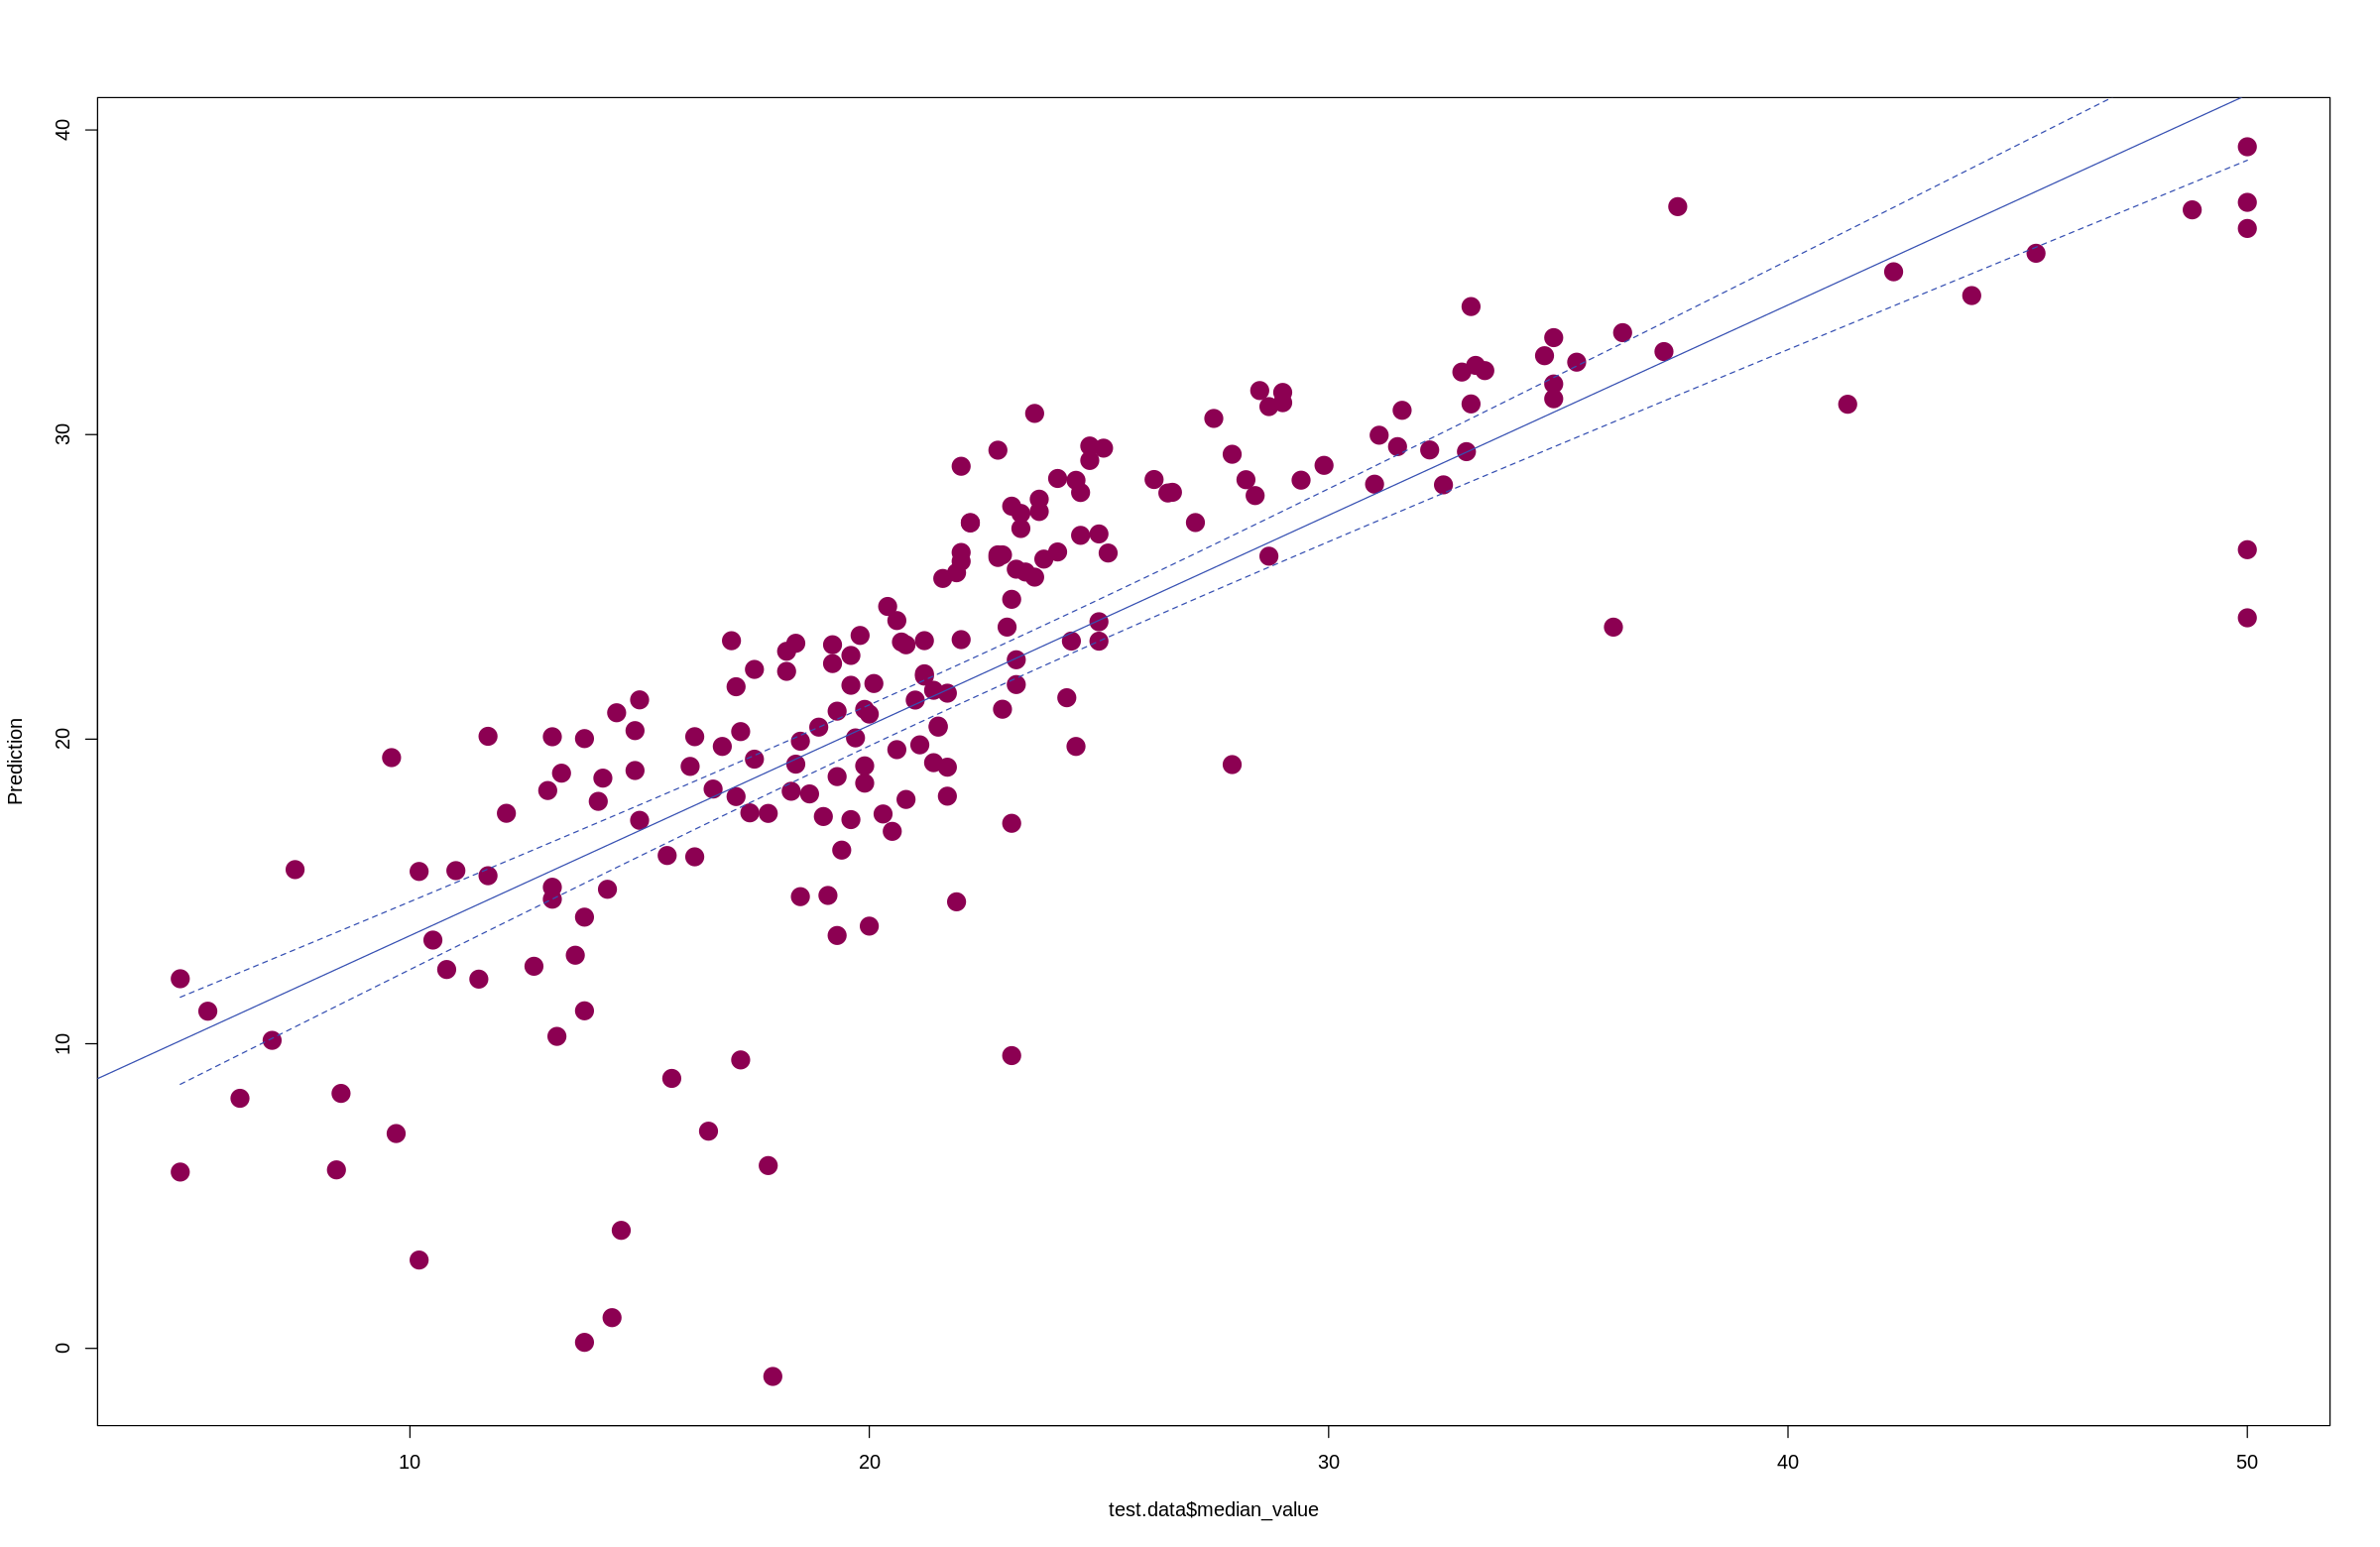

In [79]:
# Making prediction
prediction = predict(modelo_lm, data_test)

### Visualization
plot(data_test$median_value, prediction, xlab="test.data$median_value", ylab="Prediction", pch =19,col ="#8c0052", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ median_value, data = data_test)
newx = seq(min(data_test$median_value),max(data_test$median_value),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(median_value=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test$median_value),
            RMSE = RMSE(prediction, data_test$median_value),
            MAE = MAE(prediction, data_test$median_value))

## <font color='#3d59c6'>  CONCLUSIONES </font>


Haciendo un primer análisis de las variables explicativas y la objetivo, observamos que las distribuciones de los datos no seguían un patrón normal y que en muchos casos se presentaban demasiados outsliers como por ejemplo en las variables lower_status, racial_index, rooms_per_dwelling.

Observando la correlación entre variables explicativas y la variable objetivo, observamos que no todas estan correlacionadas, pero si se identificaron al menos 4 variables que se correlacionaban como lo son lower_status, rooms_per_dwelling, teacher_ratio.

El PCA análisis de componentes nos da una visión general del comportamiento de las componentes y su explicabilidad de la varianza de los datos. Con 4 de 12 componentes se puede explicar más del 80% de la varianza. Sin embargo, cuando vemos que variables son las más importantes en cada componente, tienen valores similares. De allí destacamos las principales de los primeros 3 componentes, respectivamente: tax_ratio, rooms_per_dwelling y teacher_ratio.

El análisis ANOVA nos permitió identificar si la variable categórica podría tener alguna influencia en el comportamiento de la variable objetivo. Pudimos identificar que si tiene una influencia. Cabe resaltar, que al hacer el análisis de normalidad y homosteceidad, no se cumplieron estos supuestos. Aun así, se procedió a utilizar esta variable para la construcción del modelo.

Teniendo en cuenta estos análisis previamente descritos, se seleccionaron 3 variables para la construcción del modelo; Lower_status presentó la mayor correlación con la variable objetivo, rooms_per_dwelling con alta correlación con variable objetivo y  es la variable más significativa en el componente 2 y del ANOVA c_river_variable.

Una vez seleccionadas las variables, se tomo el 60% de los datos para entrenar y el 40% para testear. Al hacer los análisis de normalidad y homosteceidad, se observa que no se cumple con estos supuestos. Se detectaron también demasiados outliers. Aún así, continuamos con el análisis ya que el análisis de autocorrelación nos indicaba que las variables eran independientes.

Ya terminado el modelo de regresión lineal se procede a hacer las predicciones.
El modelo tiene un R2 de 0.63, es decir que 63.21% de la variabilidad en la variable objetivo puede ser explicada por el modelo. Lo cual no es óptimo, pero puede ser una buena aproximación inicial a un modelo con mayor porcentaje de explicabilidad.

El Error cuadrático medio nos da la diferencia promedio entre los valores predichos por el modelo y los valores reales. Si tomamos las unidades del median_value en (x10,000 USD), habría una variación de 5.4. Con un valor de la media real de 22.53, no es del todo acertado.

Este modelo podría ser utilizado en la vida real si se tiene especial cuidado en definir de manera correcta las variables "_index" y "_ratio", entender y disminuir los outliers de estas variables y buscar valores más homogéneos que representen de manera normal la totalidad de los datos.

Se podría hacer un análisis también con los datos normalizados para tener más homogeneidad de los datos y ver si el modelo mejora en su predicción.
